In [1]:
## Python 3.8.13
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn
#!pip install dataframe_image
#!pip install sklearn
#!pip install xgboost
#!pip install dtreeviz

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime
from IPython.display import display
from IPython.display import Image

from dawithscm.utils import makeDir, distributionValue, plotpdf, plotPie, correlation, feature_importance, plotMetric
from dawithscm.prediction import prediction_regression, prediction_classification

2022-11-29 05:08:48.660133: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 1.1 Import Dataset

### 1.1.1 Train Dataset

In [3]:
file = f"data/shipping/train_2_pr.csv"
df_shipping_train = pd.read_csv(file, index_col='Unnamed: 0')
display(df_shipping_train.head())
print(f"The number of row: {df_shipping_train.shape[0]}")
print(f"The number of column: {df_shipping_train.shape[1]}")

shipment_id       send_timestamp pick_up_point drop_off_point  \
0     S000720  2019-06-08 07:17:51             A              Y   
1     S000725  2019-07-12 15:23:21             A              Y   
2     S000736  2019-10-04 14:23:29             A              Y   
3     S000738  2020-01-07 09:19:50             A              Y   
4     S000739  2020-04-11 06:36:03             A              Y   

  source_country destination_country  freight_cost  gross_weight  \
0             GB                  IN         88.61         355.0   
1             GB                  IN         85.65         105.0   
2             GB                  IN         86.22         100.0   
3             GB                  IN         94.43        1071.0   
4             GB                  IN         94.24        2007.0   

   shipment_charges shipment_mode shipping_company selected  shipping_time  
0              0.75           Air              SC3        Y        5.00741  
1              0.90         Ocean              SC1        Y       21.41215  
2              0.75           Air              SC3        Y        5.33692  
3              1.05           Air              SC2        Y        5.14792  
4              0.75           Air              SC3        Y        5.03067

The number of row: 5114
The number of column: 13


### 1.1.2 Test Dataset

In [4]:
file = f"data/shipping/test_2.csv"
df_shipping_test = pd.read_csv(file, index_col='Unnamed: 0')
display(df_shipping_test.head())
print(f"The number of row: {df_shipping_test.shape[0]}")
print(f"The number of column: {df_shipping_test.shape[1]}")

shipment_id       send_timestamp pick_up_point drop_off_point  \
0     S002736  2019-10-04 14:27:04             A              Y   
1     S002738  2020-01-07 09:39:35             A              Y   
2     S005739  2020-04-11 11:58:10             A              Y   
3     S008722  2019-06-23 11:54:41             A              Y   
4     S009737  2019-11-20 20:18:01             A              Y   

  source_country destination_country  freight_cost  gross_weight  \
0             GB                  IN         86.81         100.0   
1             GB                  IN         94.43        1006.0   
2             GB                  IN         93.55         321.0   
3             GB                  IN         88.74         355.0   
4             GB                  IN         92.83         115.0   

   shipment_charges shipment_mode shipping_company selected  
0              0.75           Air              SC3        Y  
1              0.75           Air              SC3        Y  
2              1.05           Air              SC2        Y  
3              1.05           Air              SC2        Y  
4              1.05           Air              SC2        Y

The number of row: 1260
The number of column: 12


We cannot use the test dataset because it has no shipping_time

### 1.1.3 Company Detail Dataset

In [5]:
file = f"data/shipping/shipping_companies_details_1.csv"
df_compDetail = pd.read_csv(file)
display(df_compDetail)
print(f"The number of row: {df_compDetail.shape[0]}")
print(f"The number of column: {df_compDetail.shape[1]}")

source_country destination_country shipment_mode          cut_off_time  \
0             GB                  IN         Ocean              12PM IST   
1             GB                  IN           Air                  24/7   
2             GB                  IN           Air                  24/7   
3             GB                  BD         Ocean  10 - 2 and 3 - 6 BST   
4             GB                  BD         Ocean  10 - 2 and 3 - 6 BST   

                               tat processing_days pick_up_point  \
0  Before CO - T+0\nAfter CO - T+1         Mon-Fri             A   
1                        Real-time            24/7             A   
2                   Within 15 mins            24/7             A   
3  Before CO - T+0\nAfter CO - T+1         Sun-Fri             A   
4  Before CO - T+0\nAfter CO - T+1         Sun-Fri             A   

  drop_off_point  min_cs        max_cs shipping_company  shipment_charges  
0             Y      100    2,500,000               SC1            0.9000  
1             Y      100      200,000               SC2            1.0500  
2             Y      100      200,000               SC3            0.7500  
3             X       50    4,000,000               SC1            1.1250  
4             X       50    4,000,000               SC2            0.5625

The number of row: 5
The number of column: 12


## 1.2 Data Type

In [6]:
df_shipping_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5114 entries, 0 to 5113
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   shipment_id          5114 non-null   object 
 1   send_timestamp       5114 non-null   object 
 2   pick_up_point        5114 non-null   object 
 3   drop_off_point       5114 non-null   object 
 4   source_country       5114 non-null   object 
 5   destination_country  5114 non-null   object 
 6   freight_cost         5114 non-null   float64
 7   gross_weight         5114 non-null   float64
 8   shipment_charges     5114 non-null   float64
 9   shipment_mode        5114 non-null   object 
 10  shipping_company     5114 non-null   object 
 11  selected             5114 non-null   object 
 12  shipping_time        5114 non-null   float64
dtypes: float64(4), object(9)
memory usage: 559.3+ KB


Change object to datetime

In [7]:
df_shipping_train['send_timestamp'] =  pd.to_datetime(df_shipping_train['send_timestamp'], format='%Y-%m-%d %H:%M:%S')
# display(df_shipping_train.head()
df_shipping_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5114 entries, 0 to 5113
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   shipment_id          5114 non-null   object        
 1   send_timestamp       5114 non-null   datetime64[ns]
 2   pick_up_point        5114 non-null   object        
 3   drop_off_point       5114 non-null   object        
 4   source_country       5114 non-null   object        
 5   destination_country  5114 non-null   object        
 6   freight_cost         5114 non-null   float64       
 7   gross_weight         5114 non-null   float64       
 8   shipment_charges     5114 non-null   float64       
 9   shipment_mode        5114 non-null   object        
 10  shipping_company     5114 non-null   object        
 11  selected             5114 non-null   object        
 12  shipping_time        5114 non-null   float64       
dtypes: datetime64[ns](1), float64(4),

Change from object to category without order

In [8]:
nominal_val = ['pick_up_point', 'drop_off_point', 'source_country', 
               'destination_country', 'shipment_mode', 'shipping_company', 
               'selected']
df_shipping_train = df_shipping_train.copy()
df_shipping_train[nominal_val] = df_shipping_train[nominal_val].astype("category")
df_shipping_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5114 entries, 0 to 5113
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   shipment_id          5114 non-null   object        
 1   send_timestamp       5114 non-null   datetime64[ns]
 2   pick_up_point        5114 non-null   category      
 3   drop_off_point       5114 non-null   category      
 4   source_country       5114 non-null   category      
 5   destination_country  5114 non-null   category      
 6   freight_cost         5114 non-null   float64       
 7   gross_weight         5114 non-null   float64       
 8   shipment_charges     5114 non-null   float64       
 9   shipment_mode        5114 non-null   category      
 10  shipping_company     5114 non-null   category      
 11  selected             5114 non-null   category      
 12  shipping_time        5114 non-null   float64       
dtypes: category(7), datetime64[ns](1)

## 1.3 Check some duplication of rows

Check whether there are selected column having 'N'. If so, that means we cannot use that shipping method because it was not selected.

Please note that

    More than one record in the file might have the same 'shipmentid', but 'shippingcompany' for such rows are different. 'shippingcompany' reflects potential shipping companies which might be used, and the 'selected' column shows which company (in some cases more than one) has been selected.

In [9]:
# Search for duplication rows from shipment_id
df_shipping_train_dup = df_shipping_train[["shipment_id", "freight_cost", "gross_weight", "shipment_charges", "shipment_mode", "shipping_company", "selected"]].loc[df_shipping_train['shipment_id'].duplicated(), :]
display(df_shipping_train_dup.head())
print(f"There are {len(df_shipping_train_dup)} rows containg duplication in shipmen_id column.")

# Check that whether in the duplication rows have 'selected'==N or not
df_shipping_train_dup = df_shipping_train_dup[df_shipping_train_dup['selected']=='N']
display(df_shipping_train_dup.head())
print(f"")

shipment_id  freight_cost  gross_weight  shipment_charges shipment_mode  \
1716     S388732     87.611650         806.0              0.75           Air   
1722     S390739     92.330299        1963.5              1.05           Air   
1725     S391726     85.067297         205.0              1.05           Air   
1732     S393716     90.143360        1506.0              0.75           Air   
1735     S394708     90.150662        1456.0              1.05           Air   

     shipping_company selected  
1716              SC3        Y  
1722              SC2        Y  
1725              SC2        Y  
1732              SC3        Y  
1735              SC2        Y

There are 309 rows containg duplication in shipmen_id column.


Empty DataFrame
Columns: [shipment_id, freight_cost, gross_weight, shipment_charges, shipment_mode, shipping_company, selected]
Index: []

In [10]:
temp1 = len(df_shipping_train_dup[(df_shipping_train_dup["selected"]=='N')])

print(f"Total row number: {df_shipping_train.shape[0]}")
print(f"The number of duplicated rows having 'selected'=='N' : {temp1}")

Total row number: 5114
The number of duplicated rows having 'selected'=='N' : 0


The number of rows in the dataframe is still as same as earlier. That means every shipment in dataframe got selected.

## 1.4 Check unique values for each column

In [11]:
for column in df_shipping_train.columns:
    print(f"{column}: {df_shipping_train[column].unique()}")

shipment_id: ['S000720' 'S000725' 'S000736' ... 'S1407148' 'S7478148' 'S2082151']
send_timestamp: ['2019-06-08T07:17:51.000000000' '2019-07-12T15:23:21.000000000'
 '2019-10-04T14:23:29.000000000' ... '2020-04-09T10:59:51.000000000'
 '2020-04-24T15:27:00.000000000' '2020-06-08T12:50:28.000000000']
pick_up_point: ['A']
Categories (1, object): ['A']
drop_off_point: ['Y', 'X']
Categories (2, object): ['X', 'Y']
source_country: ['GB']
Categories (1, object): ['GB']
destination_country: ['IN', 'BD']
Categories (2, object): ['BD', 'IN']
freight_cost: [ 88.61  85.65  86.22 ... 105.55 105.95 107.52]
gross_weight: [355.   105.   100.   ... 359.   398.   143.16]
shipment_charges: [0.75   0.9    1.05   0.5625 1.125 ]
shipment_mode: ['Air', 'Ocean']
Categories (2, object): ['Air', 'Ocean']
shipping_company: ['SC3', 'SC1', 'SC2']
Categories (3, object): ['SC1', 'SC2', 'SC3']
selected: ['Y']
Categories (1, object): ['Y']
shipping_time: [ 5.00741 21.41215  5.33692 ...  5.68333 41.97199  5.58981]


From unique values, we can see that 'drop_off_point' and 'destination_country' have two items in each column. So we need to check whether 'drop_off_point' represents 'destination_country' in 1-to-1 relationship or not.

In [12]:
temp1 = len(df_shipping_train[(df_shipping_train["drop_off_point"]=='Y') & (df_shipping_train["destination_country"]=='IN')])
temp2 = len(df_shipping_train[(df_shipping_train["drop_off_point"]=='Y') & (df_shipping_train["destination_country"]=='BD')])
temp3 = len(df_shipping_train[(df_shipping_train["drop_off_point"]=='X') & (df_shipping_train["destination_country"]=='IN')])
temp4 = len(df_shipping_train[(df_shipping_train["drop_off_point"]=='X') & (df_shipping_train["destination_country"]=='BD')])

print(f"Total row number: {df_shipping_train.shape[0]}")
print(f"The number of rows having 'drop_off_point'=='Y' and 'destination_country'=='IN': {temp1}")
print(f"The number of rows having 'drop_off_point'=='Y' and 'destination_country'=='BD': {temp2}")
print(f"The number of rows having 'drop_off_point'=='X' and 'destination_country'=='IN': {temp3}")
print(f"The number of rows having 'drop_off_point'=='Y' and 'destination_country'=='BD': {temp4}")

Total row number: 5114
The number of rows having 'drop_off_point'=='Y' and 'destination_country'=='IN': 4817
The number of rows having 'drop_off_point'=='Y' and 'destination_country'=='BD': 0
The number of rows having 'drop_off_point'=='X' and 'destination_country'=='IN': 0
The number of rows having 'drop_off_point'=='Y' and 'destination_country'=='BD': 297


It appears that 'drop_off_point' and 'destination_country' have 1-to-1 relationship. In this case, we can use either one of them to analysis our target.

## 1.5 Feature Engineering

In [13]:
def timeoftheday(df):
    if 0 <= df.hour < 6:
        return 'early morning'
    elif 6 <= df.hour < 12:
        return 'morning'
    elif 12 <= df.hour < 18:
        return 'afternoon'
    else:
        return 'evening'

def workinghour(df):
    if 7 < df.hour < 18:
        return 'yes'
    else:
        return 'no'

In [14]:
df_shipping_train["send_timestamp_tod"] = df_shipping_train["send_timestamp"].apply(timeoftheday)
df_shipping_train["send_timestamp_workinghr"] = df_shipping_train["send_timestamp"].apply(workinghour)
display(df_shipping_train.head())

shipment_id      send_timestamp pick_up_point drop_off_point source_country  \
0     S000720 2019-06-08 07:17:51             A              Y             GB   
1     S000725 2019-07-12 15:23:21             A              Y             GB   
2     S000736 2019-10-04 14:23:29             A              Y             GB   
3     S000738 2020-01-07 09:19:50             A              Y             GB   
4     S000739 2020-04-11 06:36:03             A              Y             GB   

  destination_country  freight_cost  gross_weight  shipment_charges  \
0                  IN         88.61         355.0              0.75   
1                  IN         85.65         105.0              0.90   
2                  IN         86.22         100.0              0.75   
3                  IN         94.43        1071.0              1.05   
4                  IN         94.24        2007.0              0.75   

  shipment_mode shipping_company selected  shipping_time send_timestamp_tod  \
0           Air              SC3        Y        5.00741            morning   
1         Ocean              SC1        Y       21.41215          afternoon   
2           Air              SC3        Y        5.33692          afternoon   
3           Air              SC2        Y        5.14792            morning   
4           Air              SC3        Y        5.03067            morning   

  send_timestamp_workinghr  
0                       no  
1                      yes  
2                      yes  
3                      yes  
4                       no

## 1.6 Pie Chart: Check the quantity of shipping in each shipment_mode and destination countries.

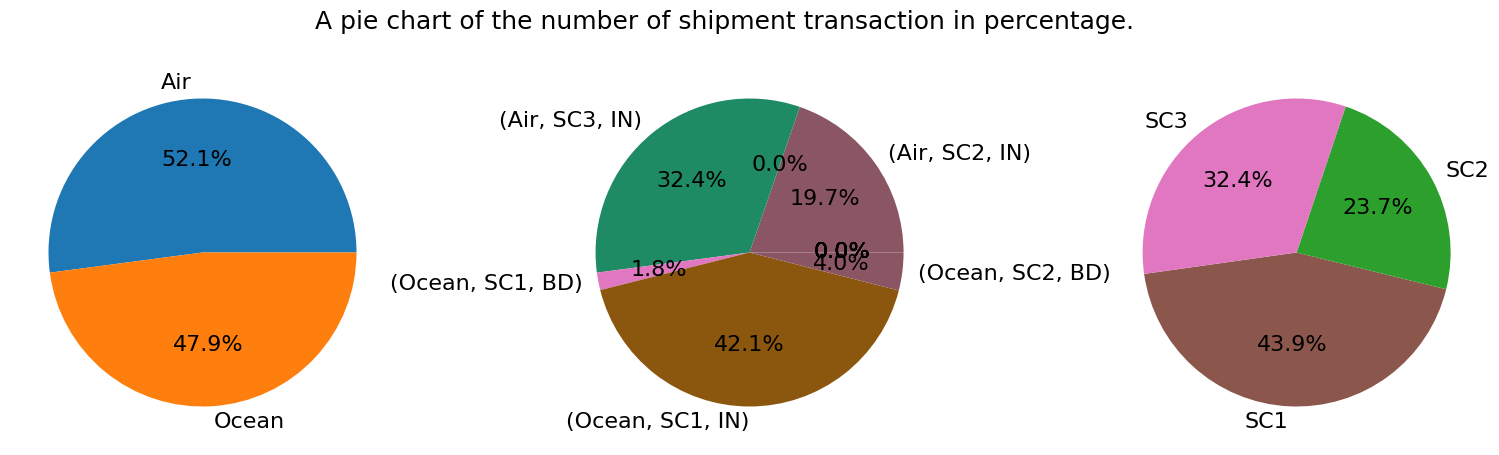

In [15]:
fig, axe = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('A pie chart of the number of shipment transaction in percentage.', size=18)

plotPie(
    df_shipping_train.groupby(['shipment_mode']).count(),
    axe[0],
    colors = [(31, 119, 180), (255, 127, 14)]  # Air->tab:blue, Ocean->tab:orange
    )
plotPie(
    df_shipping_train.groupby(['shipment_mode', 'shipping_company', 'destination_country']).count(),
    axe[1],
    colors = [(31, 140, 100), 
              (227, 119, 194), 
              (140, 86, 14), 
              (140, 86, 100), 
              (150, 140, 50)]
    )
plotPie(
    df_shipping_train.groupby(['shipping_company']).count(), 
    axe[2],
    colors = [(140, 86, 75), (44, 160, 44), (227, 119, 194)],  # tab:brown, tab:green, tab:pink
    startangle=188
    )
plt.show()

- I expected that the number of air shipment would be so much higher because air shipment is more compact but, surprisingly, the number of air shipment is just slightly higher than the ocean by 4.2%.

- SC1 has the highest market share (43.9%) compare to the other SC3 and SC2, 32.4% and 23.7% respectively.

- The number of shipments to Bangladesh is very low compare to India.

- Eventhough SC1 has the most highest number in India shipment, it is lower than SC2 by 2.2% comparing in Bangladesh.

- Because of 91% of ocean shipment is occupied by only one company, SC1, so that's why we don't have correlation with the respect to weight, price and time.



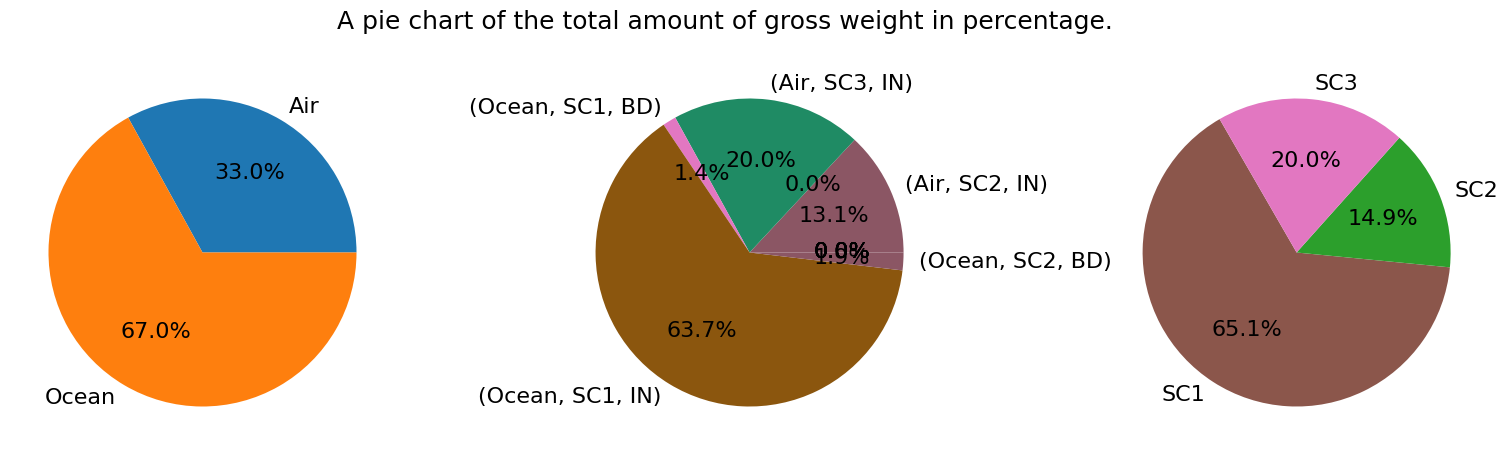

In [16]:
fig, axe = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('A pie chart of the total amount of gross weight in percentage.', size=18)

plotPie(
    df_shipping_train.groupby(['shipment_mode']).sum(numeric_only=True),
    axe[0],
    y = 'gross_weight',
    colors = [(31, 119, 180),  # Air->tab:blue
              (255, 127, 14)]  # Ocean->tab:orange
    )
plotPie(
    df_shipping_train.groupby(['shipment_mode', 'shipping_company', 'destination_country']).sum(numeric_only=True)['gross_weight'],
    axe[1],
    y = 'gross_weight',
    colors = [(31, 140, 100), 
              (227, 119, 194), 
              (140, 86, 14), 
              (140, 86, 100), 
              (150, 140, 50)]
    )
plotPie(
    df_shipping_train.groupby(['shipping_company']).sum(numeric_only=True)['gross_weight'], 
    axe[2],
    y = 'gross_weight',
    colors = [(140, 86, 75),  # tab:brown
              (44, 160, 44),  # tab:green
              (227, 119, 194)],  # tab:pink
    startangle=120
    )
plt.show()

- Gross weight of ocean shipment has more propotion than air shipment comparing to shipment transaction which air shipment has more percentage than ocean shipment. 
    - This means that air shipment can carry less weight so it needs more shipment frequency than ocen shipment.
- SC1 still has the largest propotion comparing in weight.
- In total weight, the goods was shipped to India more than Bangaladesh.

## 1.7 Scatter plot

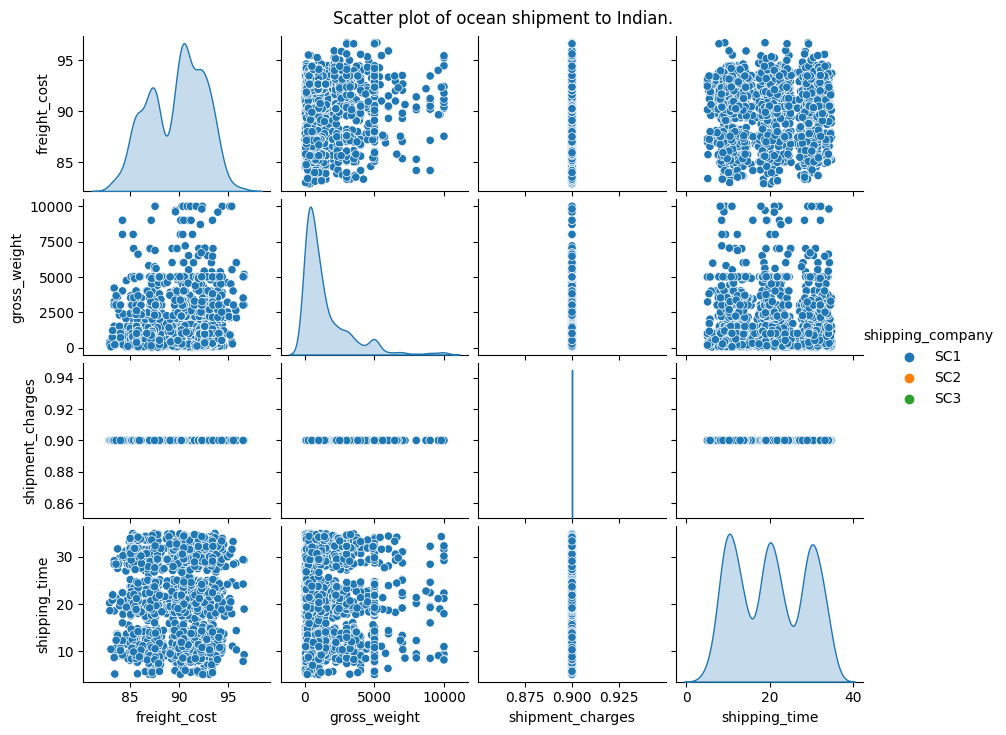

In [17]:
df_plot = df_shipping_train[(df_shipping_train['shipment_mode']=='Ocean') & 
                            (df_shipping_train['destination_country']=='IN')]

g = sns.pairplot(df_plot, hue='shipping_company')
g.fig.suptitle('Scatter plot of ocean shipment to Indian.', y=1.02)
g.fig.set_figheight(7)
g.fig.set_figwidth(10)
# g.map_offdiag(correlation)
plt.show()

Shipping_time is highly uncorrelated with feight_cost and gross_weight. For shipment_charges, it depends on each company. I don't know why shipping_time is seperated into three groups.



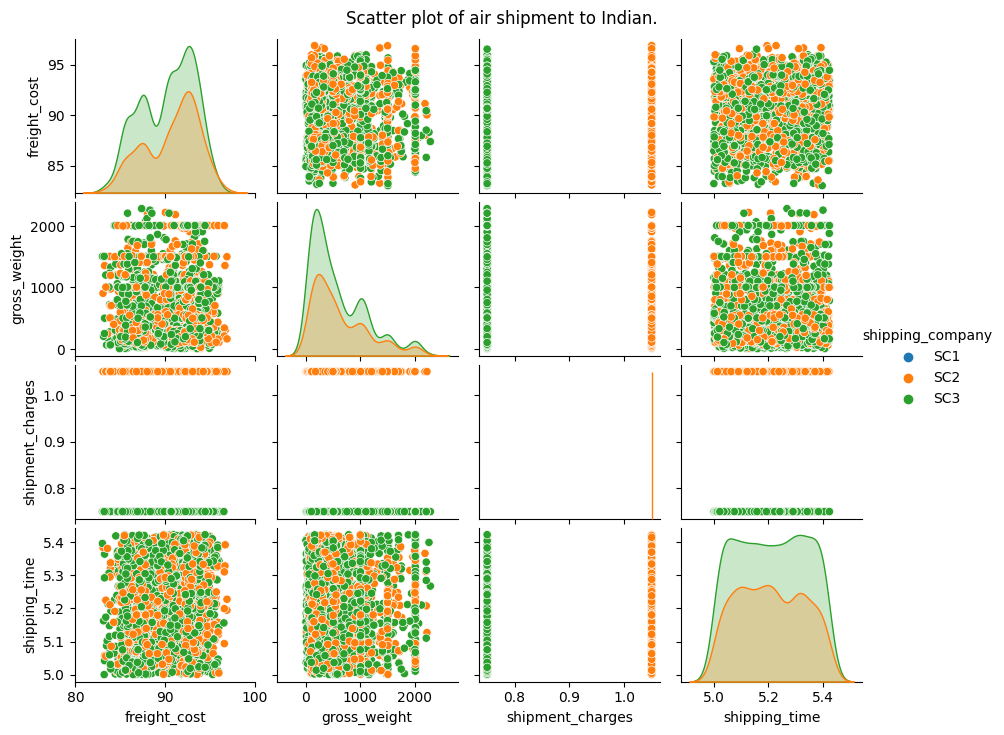

In [18]:
df_plot = df_shipping_train[(df_shipping_train['shipment_mode']=='Air') & 
                            (df_shipping_train['destination_country']=='IN')]

g = sns.pairplot(df_plot, hue='shipping_company')
g.fig.suptitle('Scatter plot of air shipment to Indian.', y=1.02)
g.fig.set_figheight(7)
g.fig.set_figwidth(10)
# g.map_offdiag(correlation)
plt.show()

Shipping_time has low correlation with feight_cost and gross_weight. For shipment_charges, it depends on each company. 

However, one interesting point that we get by observing at freight_cost of ocean and air shipment in India is there is no difference in the price/kg eventhough the shipping_time is significantly lower for air shipment.

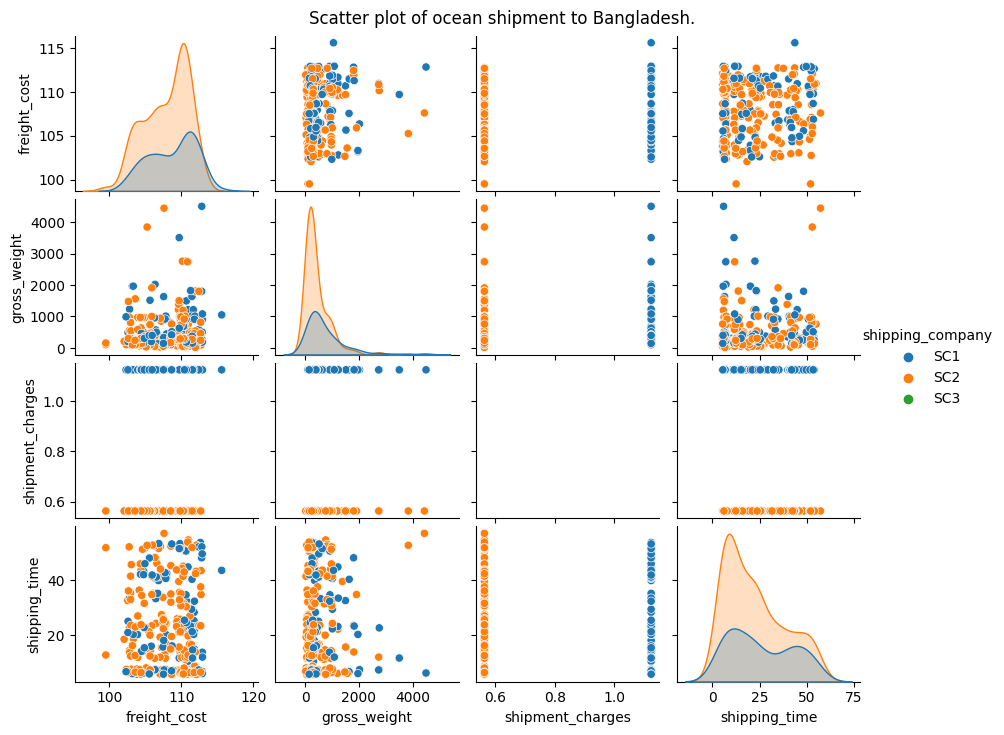

In [19]:
df_plot = df_shipping_train[(df_shipping_train['shipment_mode']=='Ocean') & 
                            (df_shipping_train['destination_country']=='BD')]

g = sns.pairplot(df_plot, hue='shipping_company')
g.fig.suptitle('Scatter plot of ocean shipment to Bangladesh.', y=1.02)
g.fig.set_figheight(7)
g.fig.set_figwidth(10)
# g.map_offdiag(correlation)
plt.show()

As same as above, low correlation between shipping_time with feight_cost and gross_weight. The cost/kg is higher and the gross_weight is lower comparing to India shipment.

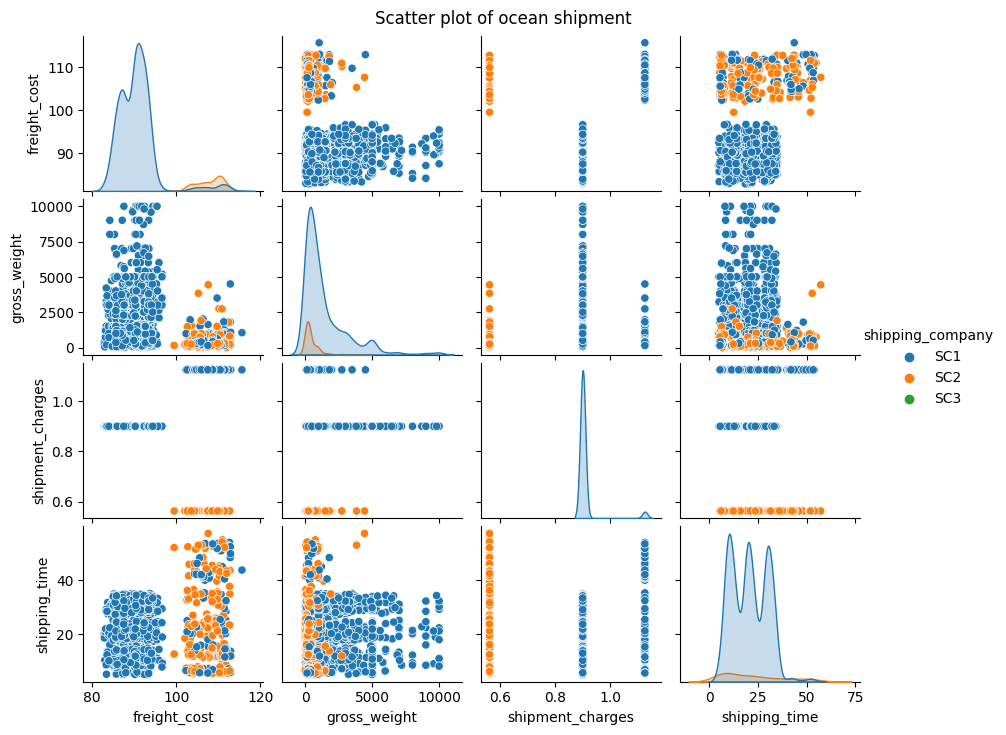

In [20]:
df_plot = df_shipping_train[(df_shipping_train['shipment_mode']=='Ocean')]

g = sns.pairplot(df_plot, hue='shipping_company')
g.fig.suptitle('Scatter plot of ocean shipment', y=1.02)
g.fig.set_figheight(7)
g.fig.set_figwidth(10)
# g.map_offdiag(correlation)
plt.show()

There is not much difference between the freight_cost and gross_weight of SC1 and SC2 but shipment_charges are less for SC2.

## 1.8 Boxplot

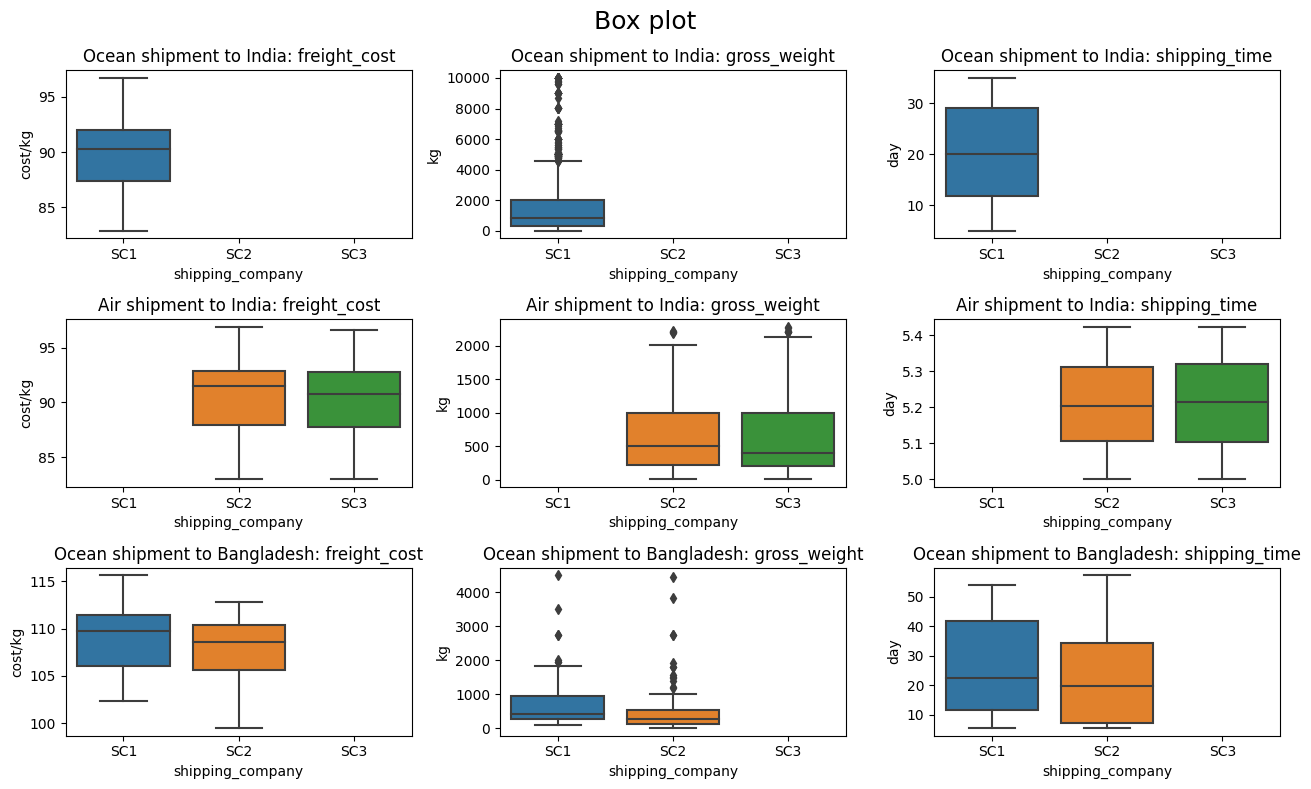

In [21]:
df_plot1 = df_shipping_train[(df_shipping_train['shipment_mode']=='Ocean') & 
                             (df_shipping_train['destination_country']=='IN')]
                            
df_plot2 = df_shipping_train[(df_shipping_train['shipment_mode']=='Air') & 
                             (df_shipping_train['destination_country']=='IN')]

df_plot3 = df_shipping_train[(df_shipping_train['shipment_mode']=='Ocean') & 
                             (df_shipping_train['destination_country']=='BD')]

df_plot = {'Ocean shipment to India': df_plot1,
           'Air shipment to India': df_plot2, 
           'Ocean shipment to Bangladesh': df_plot3}

column_dict = {'freight_cost': 'cost/kg',
               'gross_weight': 'kg',
               'shipping_time': 'day'}

fig, axe = plt.subplots(len(df_plot), len(column_dict), figsize=(13,8))
fig.suptitle('Box plot', fontsize=18)
for df_num, (name, df) in enumerate(df_plot.items()):
    for i, (column, unit) in enumerate(column_dict.items()):
        sns.boxplot(df, x='shipping_company', y=column, ax=axe[df_num][i])
        axe[df_num][i].set_title(f"{name}: {column}")
        axe[df_num][i].set_ylabel(unit)
plt.tight_layout()
plt.show()

- Average feight_cost, gross_weight and shipping_time for SC2 is lower than SC1.

- From observation, the SC1 vessel size is maybe bigger than SC2 due to the average values.

- Asumption: maybe SC1 demand in the market is quite high because of the bigger vessel that is why it is costlier.


## 1.9 Distribution

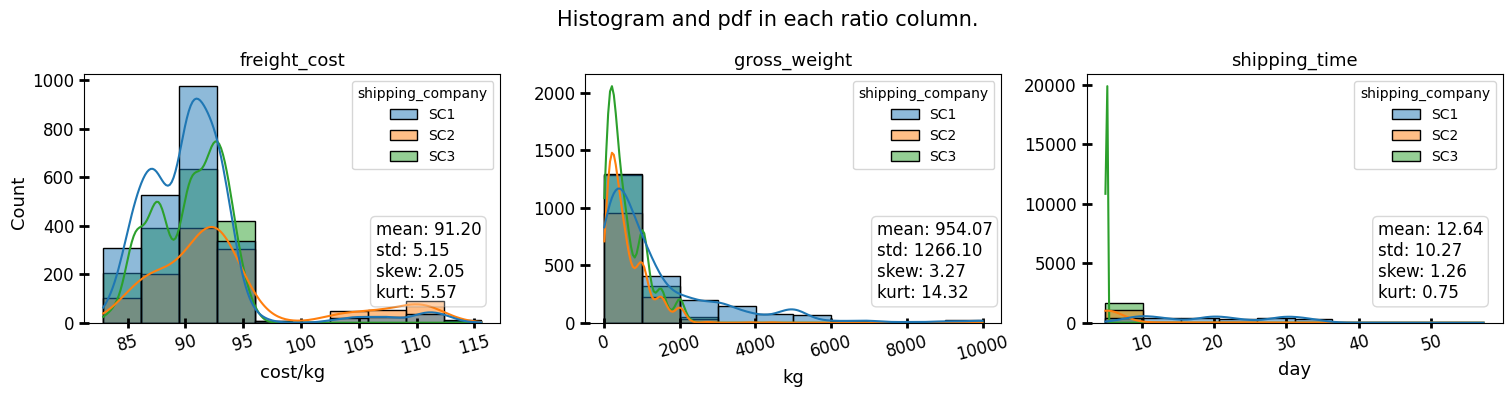

In [22]:
df_plot = df_shipping_train

fig, axe = plt.subplots(1, len(column_dict), figsize=(15, 4))
fig.suptitle('Histogram and pdf in each ratio column.', size=15)

for i, (feature, unit) in enumerate(column_dict.items()):
    plotpdf(df_plot, feature, axe[i], bins=10, hue='shipping_company')
    axe[i].set_title(feature, fontsize=13)
    axe[i].set_xlabel(unit, fontsize=13)

fig.text(-0.005, 0.500, 'Count', va='center', rotation='vertical', fontsize=13)
plt.tight_layout(h_pad=1, w_pad=1)
plt.show()

- Every column is right skew.

- We can see two distribution function shipping_time due to Ocean and Air shipments.

- We can see two distribution function on freight_cost due to India and Bangladesh.

Let's split into two kinds.

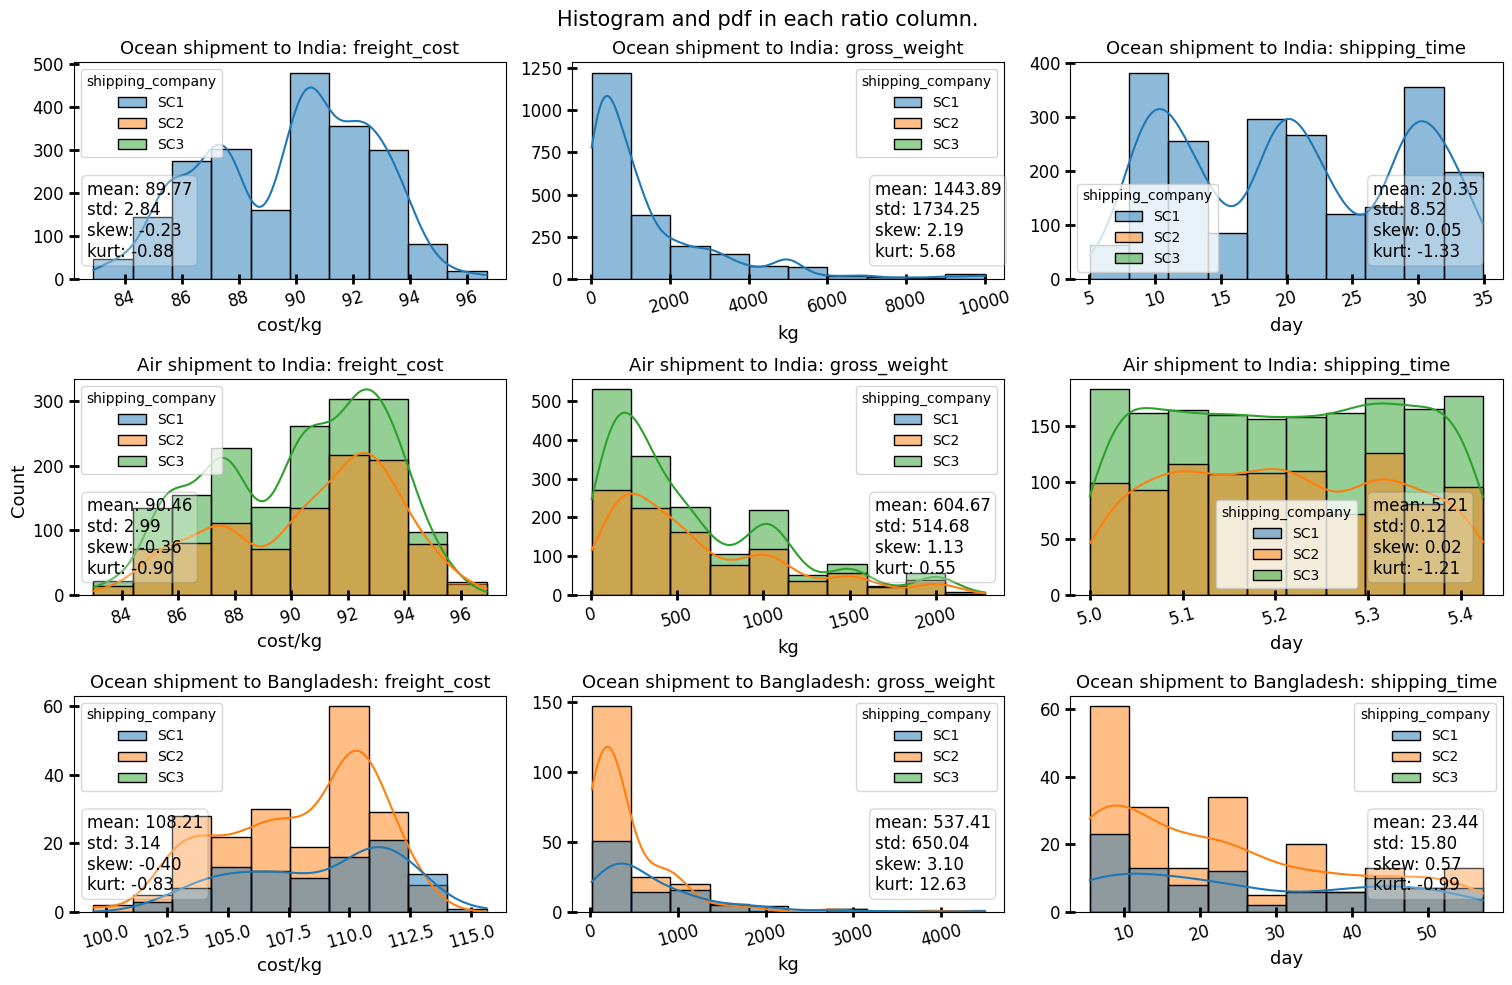

In [23]:
df_plot1 = df_shipping_train[(df_shipping_train['shipment_mode']=='Ocean') & 
                             (df_shipping_train['destination_country']=='IN')]
                            
df_plot2 = df_shipping_train[(df_shipping_train['shipment_mode']=='Air') & 
                             (df_shipping_train['destination_country']=='IN')]

df_plot3 = df_shipping_train[(df_shipping_train['shipment_mode']=='Ocean') & 
                             (df_shipping_train['destination_country']=='BD')]

df_plot = {'Ocean shipment to India': df_plot1,
           'Air shipment to India': df_plot2, 
           'Ocean shipment to Bangladesh': df_plot3}

column_dict = {'freight_cost': 'cost/kg',
               'gross_weight': 'kg',
               'shipping_time': 'day'}

fig, axe = plt.subplots(len(df_plot), len(column_dict), figsize=(15, 10))
fig.suptitle('Histogram and pdf in each ratio column.', size=15)

for df_num, (name, df) in enumerate(df_plot.items()):
    for i, (feature, unit) in enumerate(column_dict.items()):
        plotpdf(df, feature, axe[df_num][i], bins=10, hue='shipping_company')
        axe[df_num][i].set_title((f"{name}: {feature}"), fontsize=13)
        axe[df_num][i].set_xlabel(unit, fontsize=13)

fig.text(-0.005, 0.500, 'Count', va='center', rotation='vertical', fontsize=13)
plt.tight_layout(h_pad=1, w_pad=1)
plt.show()

# 2. Prediction: shipping_time 

The goal is to predict the time it takes for shipping goods.

## 2.1 Data Preprocessing

### 2.1.1 Missing data and null value

In [24]:
# Find missing values
percent_missing = df_shipping_train.isnull().sum() * 100 / len(df_shipping_train)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing}, index=df_shipping_train.columns)
display(missing_value_df.T)

shipment_id  send_timestamp  pick_up_point  drop_off_point  \
percent_missing          0.0             0.0            0.0             0.0   

                 source_country  destination_country  freight_cost  \
percent_missing             0.0                  0.0           0.0   

                 gross_weight  shipment_charges  shipment_mode  \
percent_missing           0.0               0.0            0.0   

                 shipping_company  selected  shipping_time  \
percent_missing               0.0       0.0            0.0   

                 send_timestamp_tod  send_timestamp_workinghr  
percent_missing                 0.0                       0.0

No null value presents in the data

### 2.1.2 One-Hot Encoding for Nominal values

In [25]:
column_list = ['destination_country', 'shipment_mode', 'shipping_company', 'send_timestamp_tod', 'send_timestamp_workinghr']
df_shipping_train_temp = pd.get_dummies(df_shipping_train[column_list])
df_shipping_train_clean = df_shipping_train.merge(df_shipping_train_temp, 
                                                          left_index=True, right_index=True).drop(column_list, axis=1)
df_shipping_train_clean.head()

shipment_id      send_timestamp pick_up_point drop_off_point source_country  \
0     S000720 2019-06-08 07:17:51             A              Y             GB   
1     S000725 2019-07-12 15:23:21             A              Y             GB   
2     S000736 2019-10-04 14:23:29             A              Y             GB   
3     S000738 2020-01-07 09:19:50             A              Y             GB   
4     S000739 2020-04-11 06:36:03             A              Y             GB   

   freight_cost  gross_weight  shipment_charges selected  shipping_time  ...  \
0         88.61         355.0              0.75        Y        5.00741  ...   
1         85.65         105.0              0.90        Y       21.41215  ...   
2         86.22         100.0              0.75        Y        5.33692  ...   
3         94.43        1071.0              1.05        Y        5.14792  ...   
4         94.24        2007.0              0.75        Y        5.03067  ...   

   shipment_mode_Ocean  shipping_company_SC1  shipping_company_SC2  \
0                    0                     0                     0   
1                    1                     1                     0   
2                    0                     0                     0   
3                    0                     0                     1   
4                    0                     0                     0   

   shipping_company_SC3  send_timestamp_tod_afternoon  \
0                     1                             0   
1                     0                             1   
2                     1                             1   
3                     0                             0   
4                     1                             0   

   send_timestamp_tod_early morning  send_timestamp_tod_evening  \
0                                 0                           0   
1                                 0                           0   
2                                 0                           0   
3                                 0                           0   
4                                 0                           0   

   send_timestamp_tod_morning  send_timestamp_workinghr_no  \
0                           1                            1   
1                           0                            0   
2                           0                            0   
3                           1                            0   
4                           1                            1   

   send_timestamp_workinghr_yes  
0                             0  
1                             1  
2                             1  
3                             1  
4                             0  

[5 rows x 23 columns]

## 2.2 Feature Extraction

### 2.2.1 Correlation Matrix

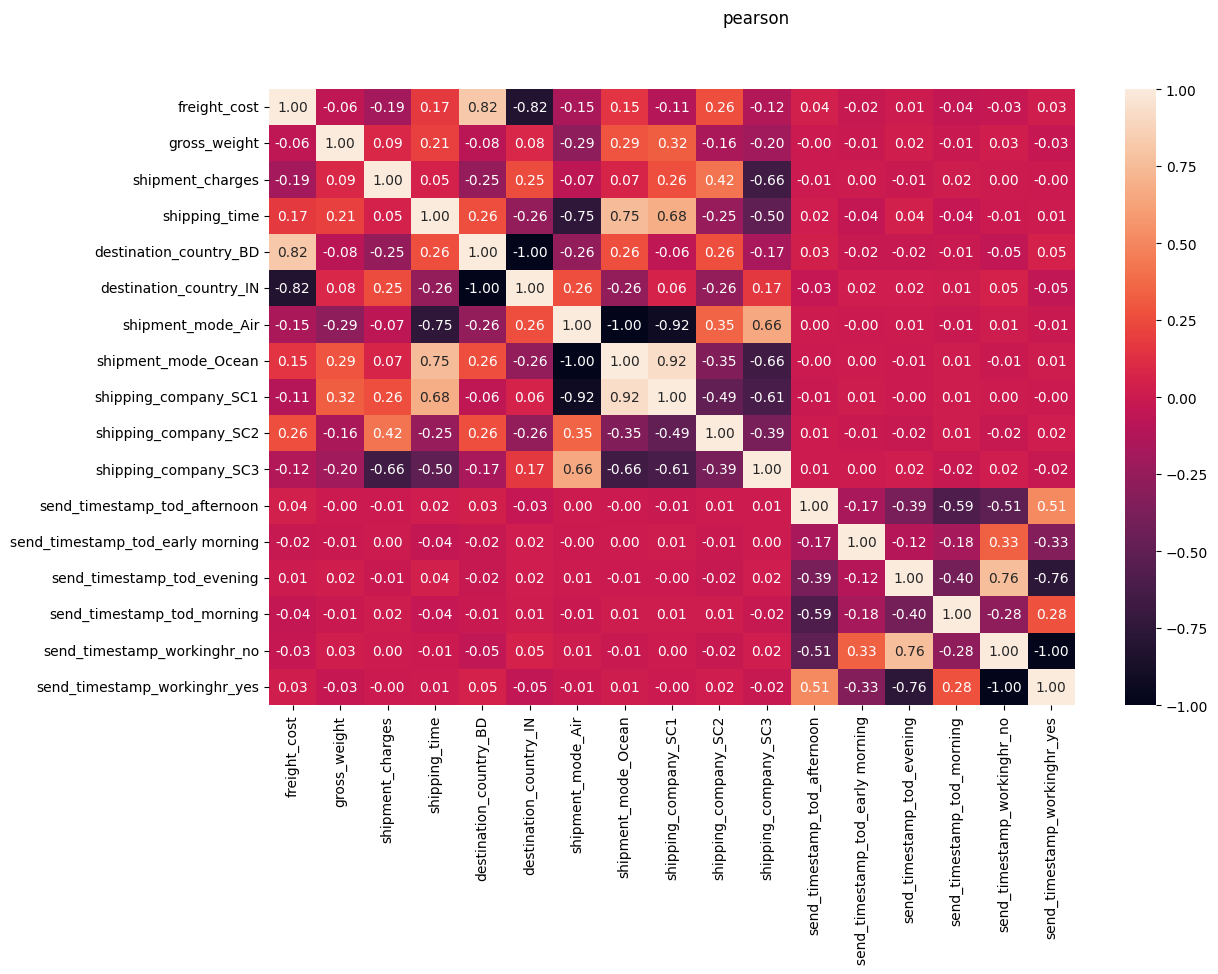

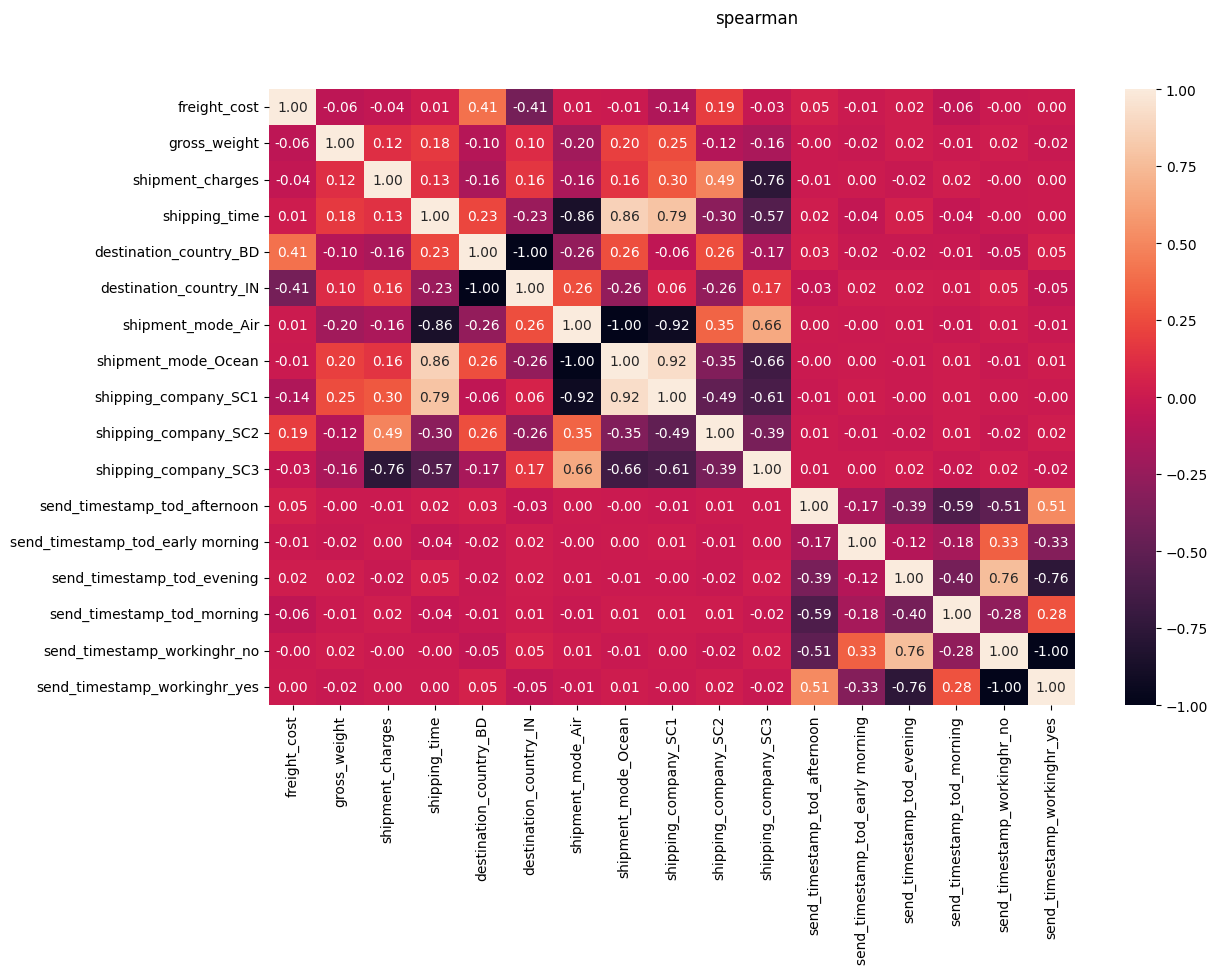

In [26]:
items = ['pearson', 'spearman']
for item in items:
    fig, axe = plt.subplots(figsize=(13,8))
    fig.suptitle(item)
    sns.heatmap(df_shipping_train_clean.corr(item, numeric_only=True), annot=True, fmt='.2f')
    plt.show()


- It appears that *shipment_mode* and *shipping_company* have very high correlation with *shipping_time* and the correlation is monotonic function due to the increase of correlation values when we use spearmann.

- The correlation matrix tells us that SC1 takes more time with shipment than the other two because most of the shipments are ocean.

- Compare to the SC2, SC3 shipment_charge is less (Air).

### 2.2.2 Feature Importance

The feature importance is calculated by noticing the increase or decrease in error when we permute the values of a feature. If permuting the values causes a huge change in the error, it means the feature is important for our model. [Ref: https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285]

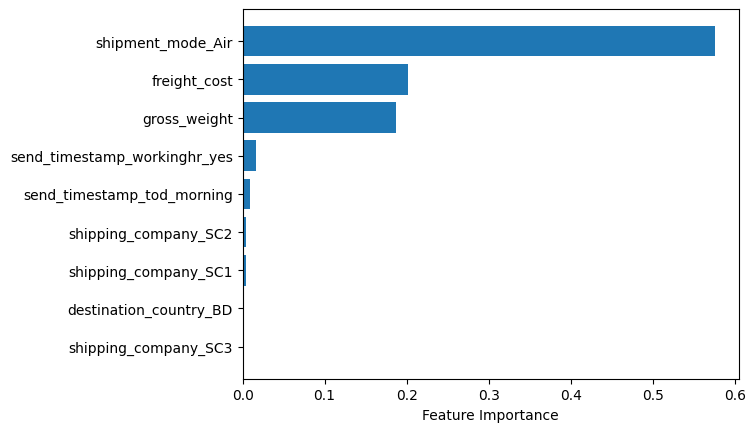

In [27]:
features = ['freight_cost', 'gross_weight', 
            'destination_country_BD', 
            'shipment_mode_Air',
            'shipping_company_SC1', 'shipping_company_SC2', 'shipping_company_SC3',
            'send_timestamp_tod_morning', 
            'send_timestamp_workinghr_yes']
target = 'shipping_time'

feature_importance(df_shipping_train_clean, features, target)

I think shipment_mode is too dominant. Let's try all the columns without it.

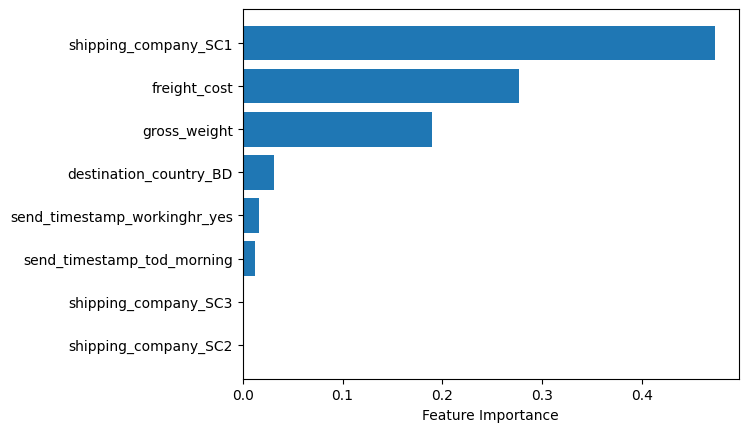

In [28]:
features = ['freight_cost', 'gross_weight', 
            'destination_country_BD', 
            'shipping_company_SC1', 'shipping_company_SC2', 'shipping_company_SC3',
            'send_timestamp_tod_morning', 
            'send_timestamp_workinghr_yes']
target = 'shipping_time'

feature_importance(df_shipping_train_clean, features, target)


shipping_company_SC1 has high effect to shipping_time but it is highly correlated with shipment_mode_Ocean. Hence we will not take this into account.

### 2.2.3 Conclusion

In [29]:
# features = ['shipment_mode_Air',
#             'freight_cost', 'gross_weight', 
#             'send_timestamp_tod_morning', 
#             'send_timestamp_workinghr_yes']
# features = ['shipment_mode_Air',
#             'freight_cost', 'gross_weight', 'shipping_company_SC1']  # worth to try
features = ['shipment_mode_Air',
            'freight_cost', 'gross_weight']
target = 'shipping_time'

## 2.3 Prediction 

### 2.3.1 Split dataset into train and test

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = df_shipping_train_clean[features]
y = df_shipping_train_clean[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify=None)

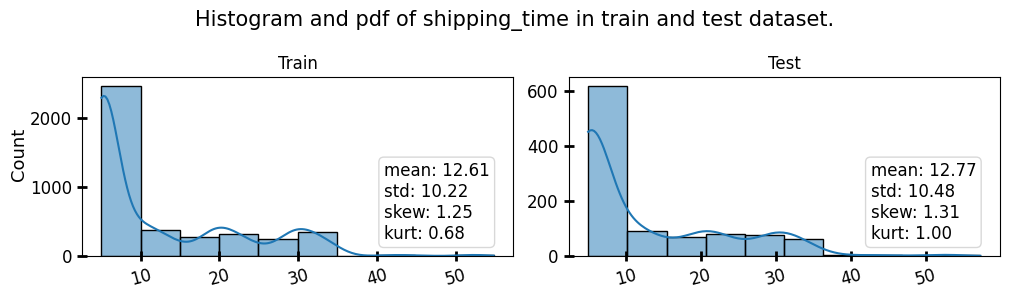

In [32]:
fig, axe = plt.subplots(1, 2, figsize=(10, 3))
fig.suptitle('Histogram and pdf of shipping_time in train and test dataset.', size=15)

plotpdf(pd.DataFrame(y_train), 'shipping_time', axe[0], bins=10)
plotpdf(pd.DataFrame(y_test), 'shipping_time', axe[1], bins=10)
axe[0].set_title('Train')
axe[1].set_title('Test')

fig.text(-0.005, 0.500, 'Count', va='center', rotation='vertical', fontsize=13)
plt.tight_layout(h_pad=1, w_pad=1)
plt.show()

From the image above, we can see the similarity in distribution between Train and Test dataset by plotting histogram.

In [33]:
from dawithscm.prediction import prediction

In [34]:
eval_dict = {}

### 2.3.2 Random Forest Regression

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        RandomForestRegressor(max_depth=100,
                                                              n_estimators=1000,
                                                              random_state=0))]),
             n_jobs=1,
             param_grid={'model__max_depth': [10, 50, 100],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [10, 100, 1000]})

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestRegressor(max_depth=10, min_samples_leaf=4,
                                       min_samples_split=10, n_estimators=1000,
                                       random_state=0))])

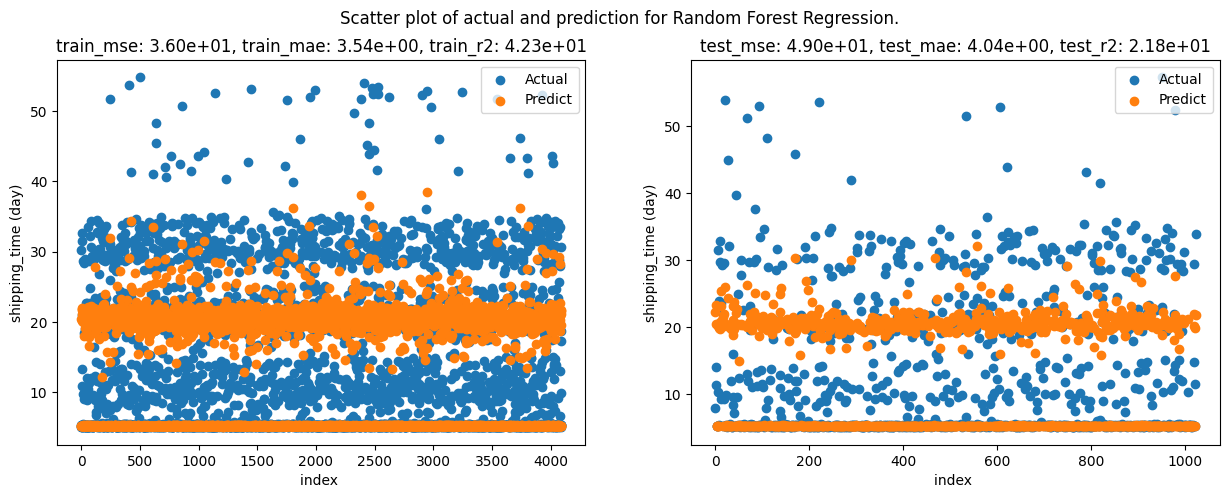

In [35]:
from sklearn.ensemble import RandomForestRegressor

# Create model
model = RandomForestRegressor(n_estimators=1000, max_depth=100, random_state=0)
predict = prediction_regression(model, X_train, X_test, y_train, y_test)

# Tuning with GridSearchCV
param_grid = {
    'model__max_depth': [10, 50, 100],
    'model__n_estimators': [10, 100, 1000],
    'model__min_samples_leaf': [1, 2, 4],
    'model__min_samples_split': [2, 5, 10],
}
predict.tuning(
    param_grid, 
    select_best=True, cv=5, 
    input_parm="GridSearchCV/RandomForestRegressor_20221126_094930/hyperparameter.pkl")
display(predict.searchCV)

# Show prediction pipline
display(predict.pipe)

# Evaluation
predict.eval(eval_dict, 'Random Forest')

# Plot
fig, axe = predict.plot(y_unit='(day)')
fig.suptitle("Scatter plot of actual and prediction for Random Forest Regression.")
plt.show()

Show a tree from Random Forest

In [36]:
# # Extract single tree
# estimator = model.estimators_[0]
# fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (4,4), dpi=800)
# tree.plot_tree(estimator,
#                feature_names = features,
#                class_names = target,
#                filled = True)
# fig.savefig('rf_individualtree.png')


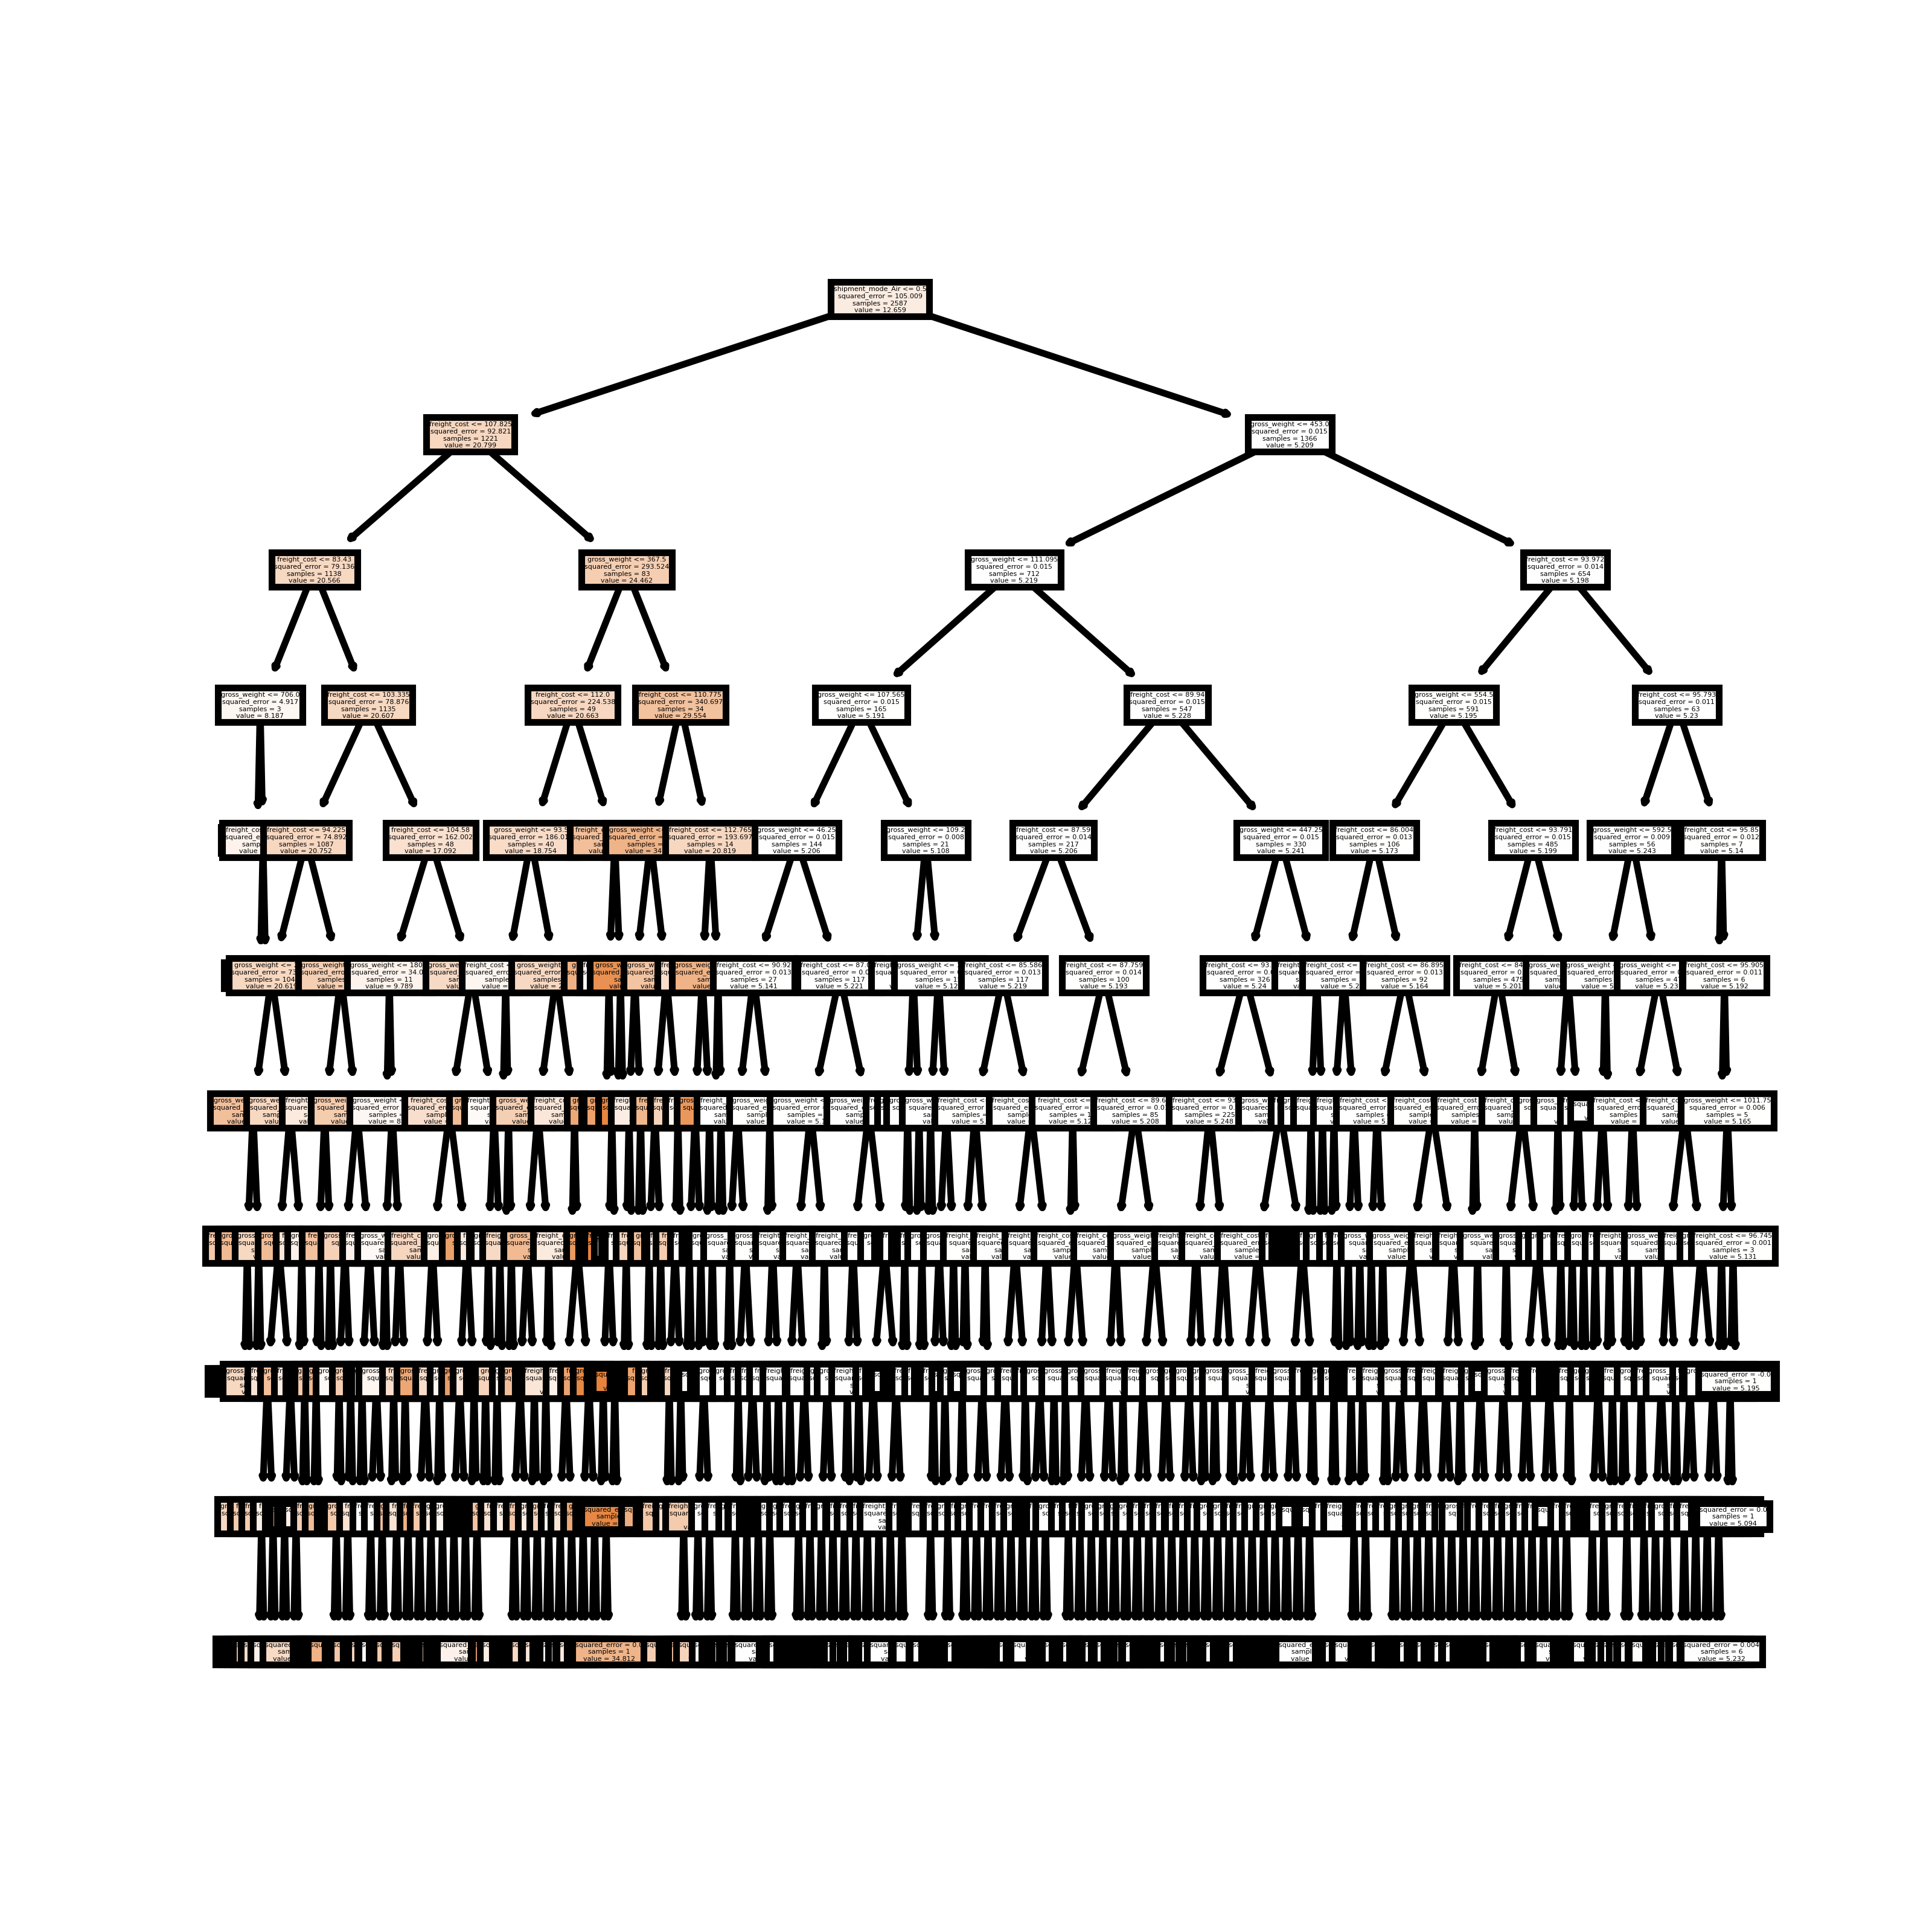

In [37]:
Image("rf_individualtree.png")

### 2.3.3 Linear Regression

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

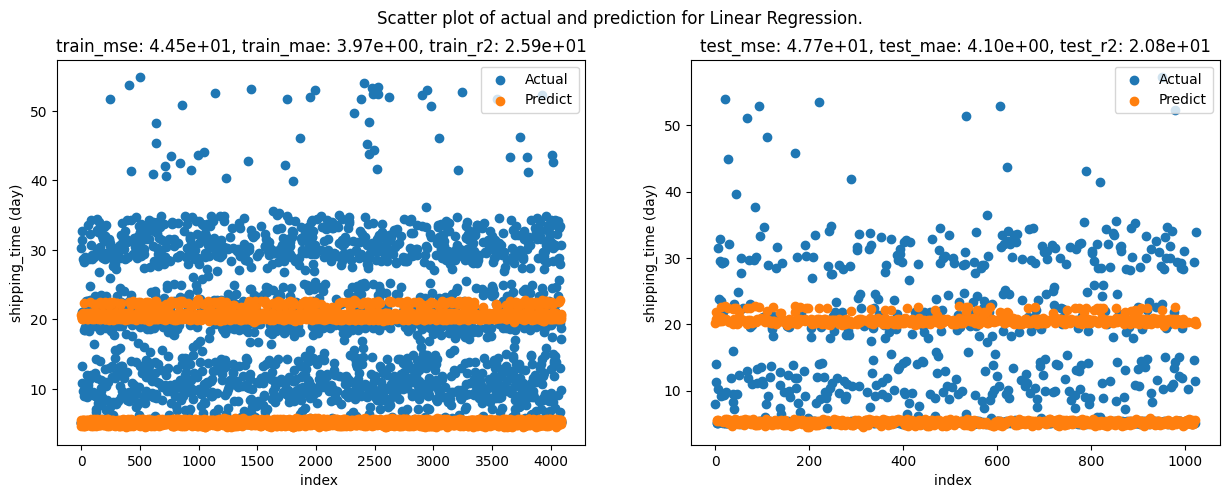

In [38]:
from sklearn.linear_model import LinearRegression

# Create model
model = LinearRegression()
predict = prediction_regression(model, X_train, X_test, y_train, y_test)

# Show prediction pipline
display(predict.pipe)

# Evaluation
predict.eval(eval_dict, 'Linear')

# Plot
fig, axe = predict.plot(y_unit='(day)')
fig.suptitle("Scatter plot of actual and prediction for Linear Regression.")
plt.show()

### 2.3.4 Polynomial Regression

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

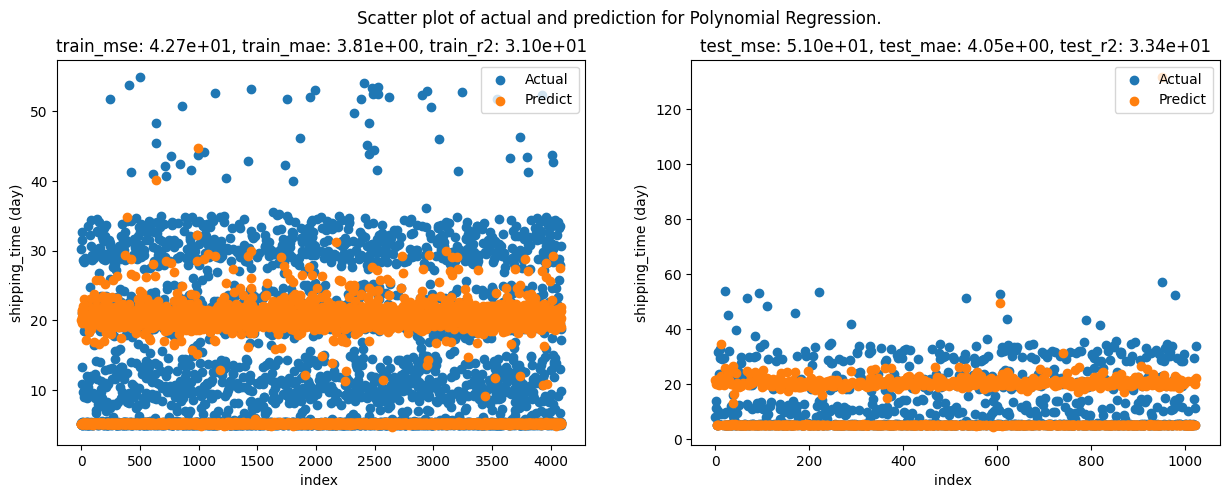

In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Create Polynomial Function
poly = PolynomialFeatures(10)
X_train_poly = poly.fit_transform(np.array(X_train))
X_test_poly = poly.fit_transform(np.array(X_test))

# Create model
model = LinearRegression()
predict = prediction_regression(model, X_train_poly, X_test_poly, y_train, y_test)

# Show prediction pipline
display(predict.pipe)

# Evaluation
predict.eval(eval_dict, 'Polynomial')

# Plot
fig, axe = predict.plot(y_unit='(day)')
fig.suptitle("Scatter plot of actual and prediction for Polynomial Regression.")
plt.show()

### 2.3.5 K-Nearest Neighbors Regression

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        KNeighborsRegressor(algorithm='ball_tree',
                                                            n_neighbors=30))]),
             n_jobs=1,
             param_grid={'model__n_neighbors': [3, 11, 21, 31, 41, 51]})

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(algorithm='ball_tree', n_neighbors=51))])

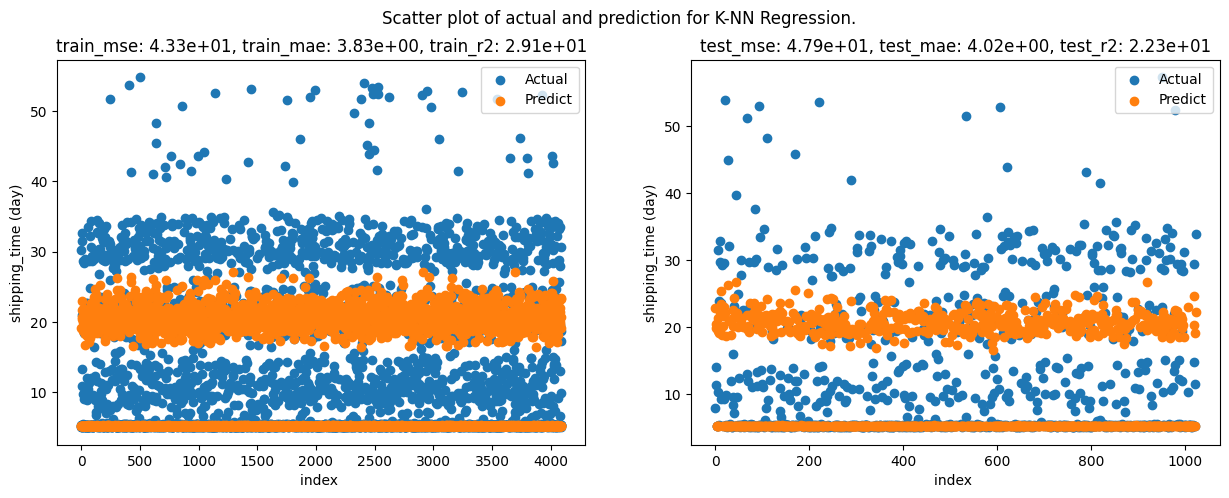

In [40]:
from sklearn.neighbors import KNeighborsRegressor

# Create model
model = KNeighborsRegressor(
    n_neighbors=30, 
    algorithm='ball_tree')
predict = prediction_regression(model, X_train, X_test, y_train, y_test)

# Tuning with GridSearchCV
param_grid = {
    'model__n_neighbors': [3, 11, 21, 31, 41, 51]
}
predict.tuning(
    param_grid, 
    select_best=True, cv=5,
    input_parm="GridSearchCV/KNeighborsRegressor_20221126_100452/hyperparameter.pkl")
display(predict.searchCV)

# Show prediction pipline
display(predict.pipe)

# Evaluation
predict.eval(eval_dict, 'KNN')

# Plot
fig, axe = predict.plot(y_unit='(day)')
fig.suptitle("Scatter plot of actual and prediction for K-NN Regression.")
plt.show()

### 2.3.6 Support Vetor Machine

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(degree=10))]),
             n_jobs=1,
             param_grid={'model__degree': [3, 11, 19],
                         'model__kernel': ['rbf', 'sigmoid']})

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR())])

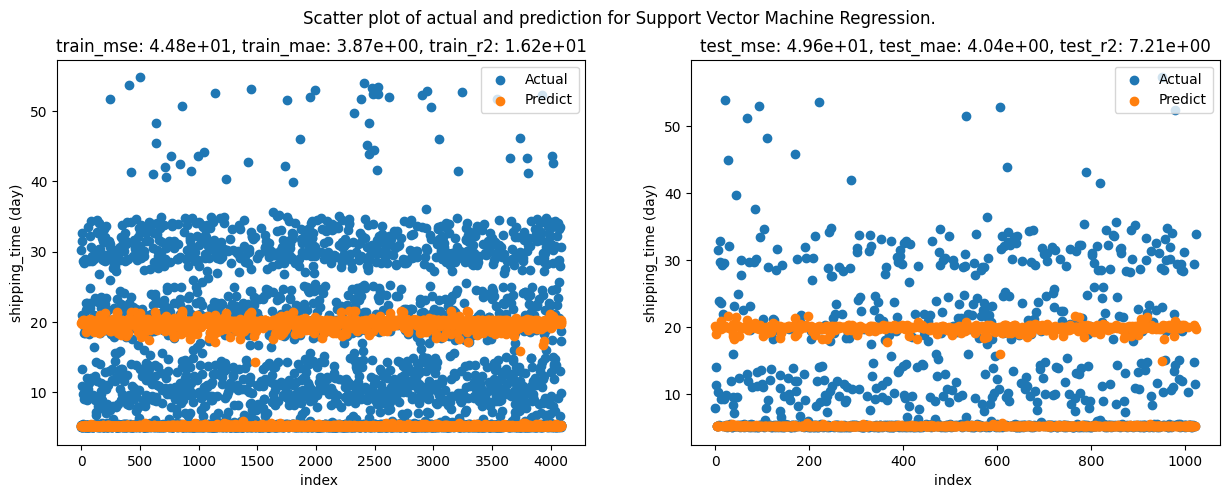

In [41]:
from sklearn.svm import SVR

# Create Model
model = SVR(kernel = 'rbf', degree = 10)
predict = prediction_regression(model, X_train, X_test, y_train, y_test)

# Tuning with GridSearchCV
param_grid = {
    'model__kernel': ['rbf', 'sigmoid'],
    'model__degree': [3, 11, 19]
}
predict.tuning(
    param_grid, 
    select_best=True, cv=5,
    input_parm='GridSearchCV/SVR_20221126_190637/hyperparameter.pkl')
display(predict.searchCV)

# Show prediction pipline
display(predict.pipe)

# Evaluation
predict.eval(eval_dict, 'Kernel SVM')

# Plot
fig, axe = predict.plot(y_unit='(day)')
fig.suptitle("Scatter plot of actual and prediction for Support Vector Machine Regression.")
plt.show()

### 2.3.7 XGBoost

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        XGBRegressor(base_score=0.5,
                                                     booster='gbtree',
                                                     callbacks=None,
                                                     colsample_bylevel=0.5,
                                                     colsample_bynode=1,
                                                     colsample_bytree=1,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=None,
                                                     gamma=0, gpu_id=-1,
                                                     grow_policy='depthwise',
                                                     importance_type=Non...
                                                     learning_rate=0.01,
                                                     max_bin=256,
                                                     max_cat_threshold=64,
                                                     max_cat_to_onehot=4,
                                                     max_delta_step=0,
                                                     max_depth=1000,
                                                     max_leaves=0,
                                                     min_child_weight=1,
                                                     missing=nan,
                                                     monotone_constraints='()',
                                                     n_estimators=1000,
                                                     n_jobs=0,
                                                     num_parallel_tree=1,
                                                     predictor='auto',
                                                     random_state=0, ...))]),
             n_jobs=1,
             param_grid={'model__max_depth': [10, 50, 100],
                         'model__n_estimators': [10, 100, 1000]})

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=0.5, colsample_bynode=1,
                              colsample_bytree=1, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=0, gpu_id=-1,
                              grow_policy='depthwise', importance_type=None,
                              interaction_constraints='', learning_rate=0.01,
                              max_bin=256, max_cat_threshold=64,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=10, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=1000, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, ...))])

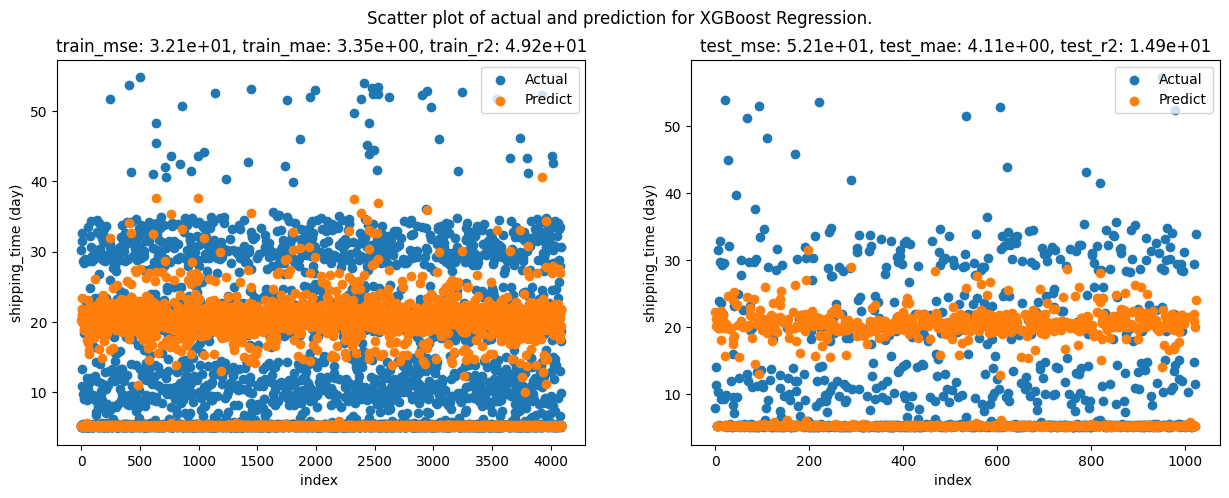

In [42]:
import xgboost as xgb

# Create model
model = xgb.XGBRegressor(
    objective ='reg:squarederror', 
    max_depth = 1000, 
    colsample_bylevel = 0.5,
    learning_rate = 0.01,
    n_estimators = 1000)
predict = prediction_regression(model, X_train, X_test, y_train, y_test)

# Tuning with GridSearchCV
param_grid = {
    'model__max_depth': [10, 50, 100],
    'model__n_estimators': [10, 100, 1000]
}
predict.tuning(
    param_grid, 
    select_best=True, cv=5,
    input_parm='GridSearchCV/XGBRegressor_20221126_191740/hyperparameter.pkl')
display(predict.searchCV)

# Show prediction pipline
display(predict.pipe)

# Evaluation
predict.eval(eval_dict, 'XGBoost')

# Plot
fig, axe = predict.plot(y_unit='(day)')
fig.suptitle("Scatter plot of actual and prediction for XGBoost Regression.")
plt.show()

### 2.3.8 Plot the metrics

In [43]:
df_plot = pd.DataFrame(eval_dict).T
df_plot

train_mse  train_mae   train_r2   test_mse  test_mae    test_r2
Random Forest  35.959325   3.539386  42.276430  48.978056  4.035659  21.754113
Linear         44.466013   3.966702  25.867890  47.703119  4.100169  20.817006
Polynomial     42.655948   3.809086  30.982493  51.034084  4.047745  33.395343
KNN            43.314072   3.834928  29.065163  47.871925  4.017958  22.334652
Kernel SVM     44.790528   3.867726  16.226758  49.611993  4.040624   7.208720
XGBoost        32.126020   3.350013  49.168313  52.130462  4.110657  14.872574

In [44]:
# Convert to percentage
def convertToPercentage(df, column):
    df = 100. * df[column] / df[column].sum().round(1)
    return df

df_plot['train_mse'] = convertToPercentage(df_plot,'train_mse')
df_plot['train_mae'] = convertToPercentage(df_plot,'train_mae')
df_plot['test_mse'] = convertToPercentage(df_plot,'test_mse')
df_plot['test_mae'] = convertToPercentage(df_plot,'test_mae')
display(df_plot)

train_mse  train_mae   train_r2   test_mse   test_mae  \
Random Forest  14.779830  15.800830  42.276430  16.474287  16.539584   
Linear         18.276208  17.708491  25.867890  16.045449  16.803970   
Polynomial     17.532243  17.004848  30.982493  17.165854  16.589118   
KNN            17.802742  17.120214  29.065163  16.102228  16.467041   
Kernel SVM     18.409588  17.266633  16.226758  16.687519  16.559933   
XGBoost        13.204283  14.955413  49.168313  17.534632  16.846954   

                 test_r2  
Random Forest  21.754113  
Linear         20.817006  
Polynomial     33.395343  
KNN            22.334652  
Kernel SVM      7.208720  
XGBoost        14.872574

In [45]:
df_plot.sort_values(by='test_r2', ascending=False, inplace=True)
df_plot

train_mse  train_mae   train_r2   test_mse   test_mae  \
Polynomial     17.532243  17.004848  30.982493  17.165854  16.589118   
KNN            17.802742  17.120214  29.065163  16.102228  16.467041   
Random Forest  14.779830  15.800830  42.276430  16.474287  16.539584   
Linear         18.276208  17.708491  25.867890  16.045449  16.803970   
XGBoost        13.204283  14.955413  49.168313  17.534632  16.846954   
Kernel SVM     18.409588  17.266633  16.226758  16.687519  16.559933   

                 test_r2  
Polynomial     33.395343  
KNN            22.334652  
Random Forest  21.754113  
Linear         20.817006  
XGBoost        14.872574  
Kernel SVM      7.208720

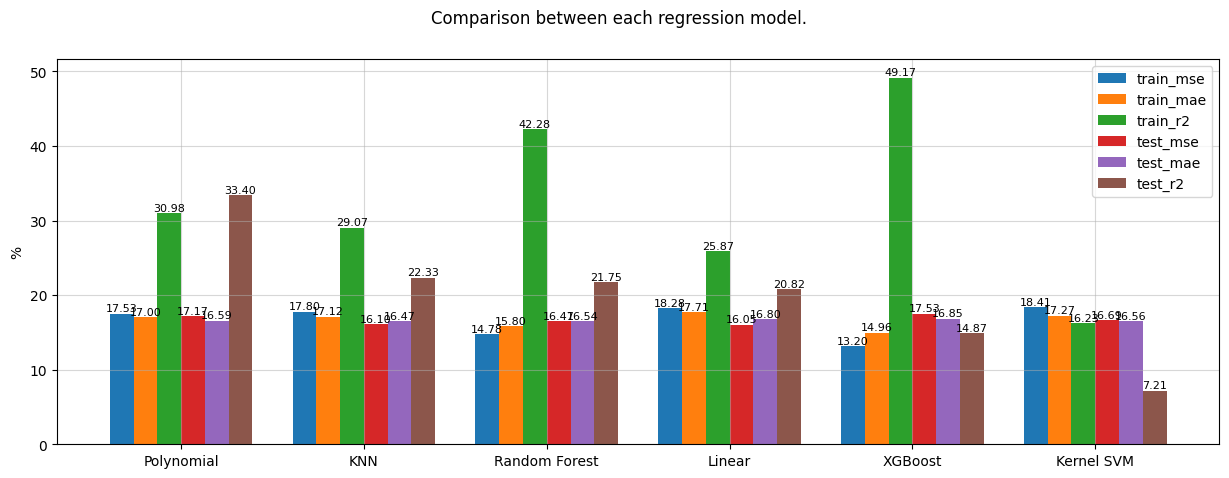

In [46]:
fig, axe = plotMetric(df_plot, width = 0.13)
fig.suptitle('Comparison between each regression model.')
axe.set_ylabel('%')
plt.show()

- It appears that polynomial model fit the data the most.
- Every model performs poorly result.

# 3. Prediction: shipping_mode

Goal is to predict suitable shipping_mode from input data (destination_country, freight_cost and gross_weight).

## 3.1 Data Preprocessing

### 3.1.1 Missing data and null value

In [47]:
df_shipping_train.isnull().sum()

shipment_id                 0
send_timestamp              0
pick_up_point               0
drop_off_point              0
source_country              0
destination_country         0
freight_cost                0
gross_weight                0
shipment_charges            0
shipment_mode               0
shipping_company            0
selected                    0
shipping_time               0
send_timestamp_tod          0
send_timestamp_workinghr    0
dtype: int64

No null value presents in the data

### 3.1.2 One-Hot Encoding for Nominal values

In [48]:
column_list = ['destination_country', 'shipment_mode', 'shipping_company']
df_shipping_train_temp = pd.get_dummies(df_shipping_train[column_list])
df_shipping_train_clean = df_shipping_train.merge(df_shipping_train_temp, 
                                                          left_index=True, right_index=True).drop(column_list, axis=1)
df_shipping_train_clean.head()

shipment_id      send_timestamp pick_up_point drop_off_point source_country  \
0     S000720 2019-06-08 07:17:51             A              Y             GB   
1     S000725 2019-07-12 15:23:21             A              Y             GB   
2     S000736 2019-10-04 14:23:29             A              Y             GB   
3     S000738 2020-01-07 09:19:50             A              Y             GB   
4     S000739 2020-04-11 06:36:03             A              Y             GB   

   freight_cost  gross_weight  shipment_charges selected  shipping_time  \
0         88.61         355.0              0.75        Y        5.00741   
1         85.65         105.0              0.90        Y       21.41215   
2         86.22         100.0              0.75        Y        5.33692   
3         94.43        1071.0              1.05        Y        5.14792   
4         94.24        2007.0              0.75        Y        5.03067   

  send_timestamp_tod send_timestamp_workinghr  destination_country_BD  \
0            morning                       no                       0   
1          afternoon                      yes                       0   
2          afternoon                      yes                       0   
3            morning                      yes                       0   
4            morning                       no                       0   

   destination_country_IN  shipment_mode_Air  shipment_mode_Ocean  \
0                       1                  1                    0   
1                       1                  0                    1   
2                       1                  1                    0   
3                       1                  1                    0   
4                       1                  1                    0   

   shipping_company_SC1  shipping_company_SC2  shipping_company_SC3  
0                     0                     0                     1  
1                     1                     0                     0  
2                     0                     0                     1  
3                     0                     1                     0  
4                     0                     0                     1

## 3.2 Feature Extraction

### 3.2.1 Heatmap

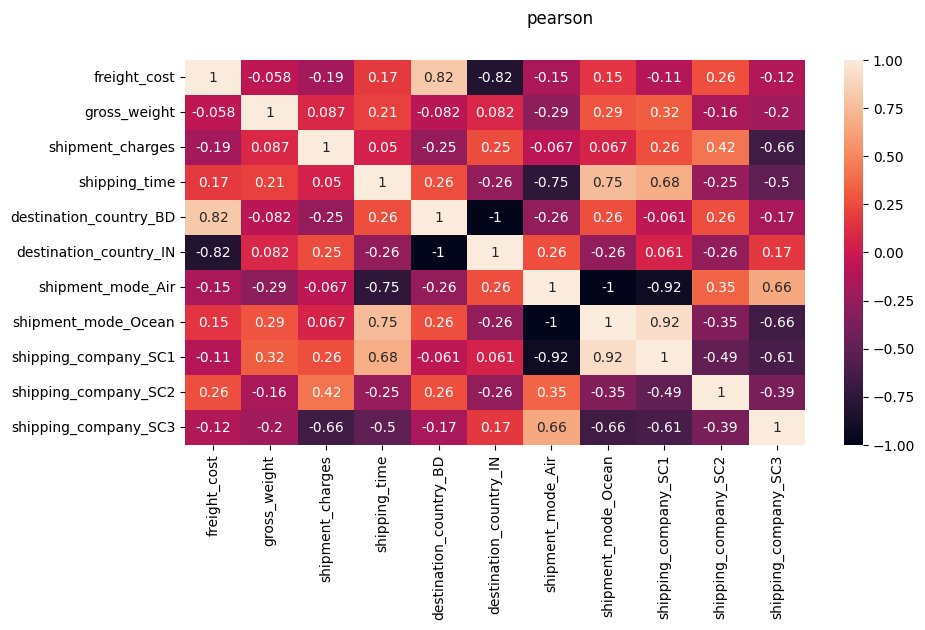

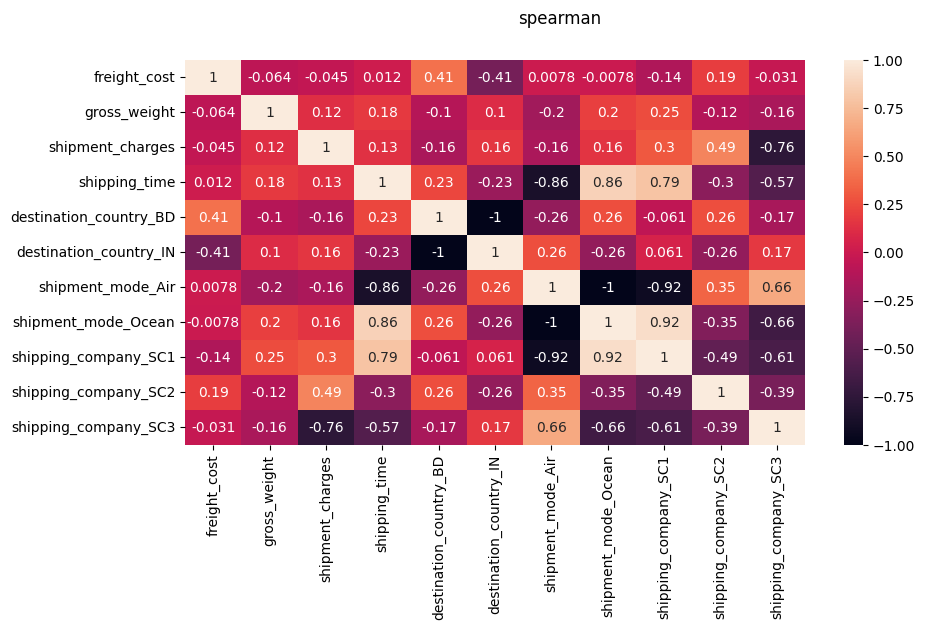

In [49]:
items = ['pearson', 'spearman']
for item in items:
    fig, axe = plt.subplots(figsize=(10,5))
    fig.suptitle(item)
    sns.heatmap(df_shipping_train_clean.corr(item, numeric_only=True), annot=True)
    plt.show()


In [50]:
df_shipping_train_clean.corr(item, numeric_only=True).sort_values('shipment_mode_Ocean')['shipment_mode_Ocean']

shipment_mode_Air        -1.000000
shipping_company_SC3     -0.663642
shipping_company_SC2     -0.347270
destination_country_IN   -0.258925
freight_cost             -0.007787
shipment_charges          0.155800
gross_weight              0.202225
destination_country_BD    0.258925
shipping_time             0.859720
shipping_company_SC1      0.923149
shipment_mode_Ocean       1.000000
Name: shipment_mode_Ocean, dtype: float64

As we can see shipmen_mode_ocean is highly correlated to shipping_time and SC1.

### 3.2.2 Feature Importance

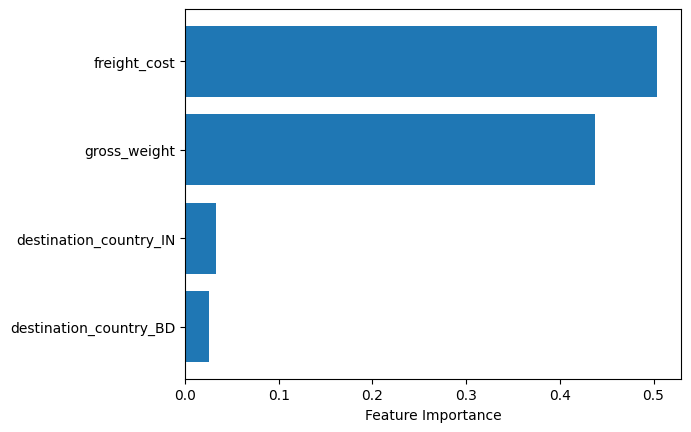

In [51]:
# Select everything first
features = ['freight_cost', 'gross_weight', 
            'destination_country_BD', 'destination_country_IN']
target = 'shipment_mode_Ocean'

feature_importance(df_shipping_train_clean, features, target)


In contrast from correlation, freight_cost has highest effect to shipping_mode so we will keep it as a feature.

### 3.2.3 Conclusion

In [52]:
features = ['destination_country_IN', 'freight_cost', 'gross_weight']
#features = ['destination_country_IN', 'gross_weight']
target = 'shipment_mode_Ocean'

## 2.3 Prediction 

### 2.3.1 Split dataset into train and test

In [53]:
X = df_shipping_train_clean[features]
y = df_shipping_train_clean[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify=None)

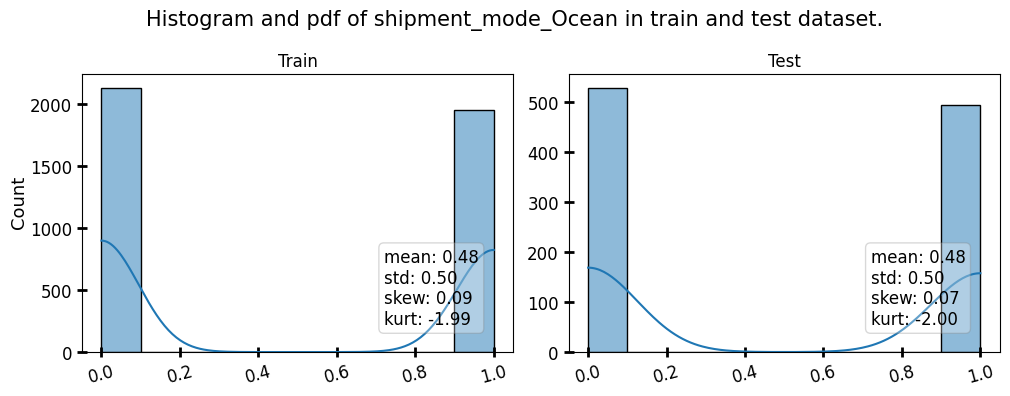

In [54]:
fig, axe = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Histogram and pdf of shipment_mode_Ocean in train and test dataset.', size=15)

plotpdf(pd.DataFrame(y_train), 'shipment_mode_Ocean', axe[0], bins=10)
plotpdf(pd.DataFrame(y_test), 'shipment_mode_Ocean', axe[1], bins=10)
axe[0].set_title('Train')
axe[1].set_title('Test')

fig.text(-0.005, 0.500, 'Count', va='center', rotation='vertical', fontsize=13)
plt.tight_layout(h_pad=1, w_pad=1)
plt.show()

From the image above, we can see the similarity in distribution between Train and Test dataset by plotting histogram. We are good to go!

In [55]:
eval_dict2 = {}

### 3.3.2 Random Forest Classification

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        RandomForestClassifier(max_depth=1000,
                                                               random_state=0))]),
             n_jobs=1,
             param_grid={'model__max_depth': [10, 50, 100],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [10, 100, 1000]})

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(max_depth=50, min_samples_leaf=2,
                                        min_samples_split=10, n_estimators=1000,
                                        random_state=0))])

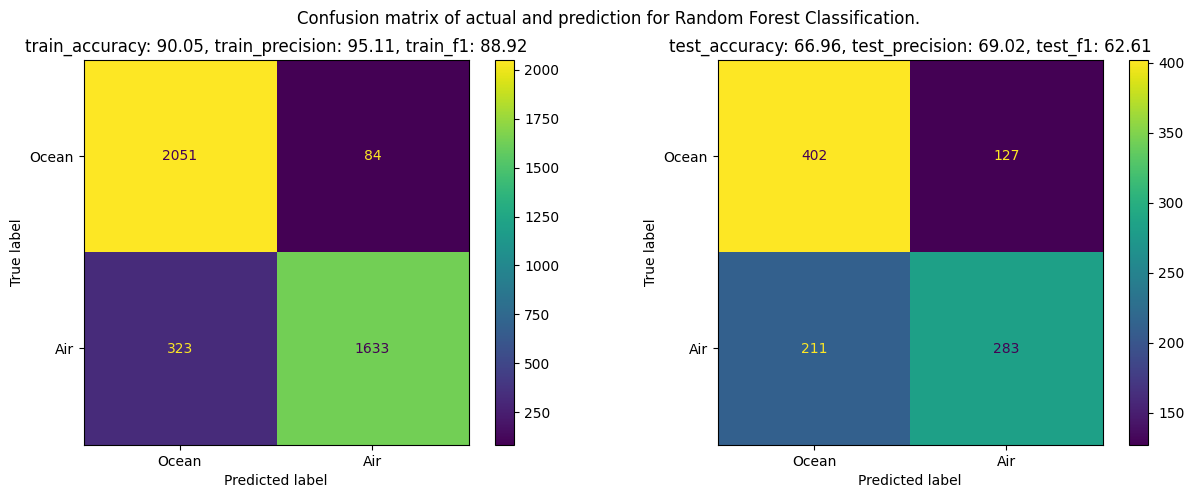

In [56]:
from sklearn.ensemble import RandomForestClassifier

# Create model
model = RandomForestClassifier(max_depth=1000, random_state=0)
predict = prediction_classification(model, X_train, X_test, y_train, y_test)

# Tuning with GridSearchCV
param_grid = {
    'model__max_depth': [10, 50, 100],
    'model__n_estimators': [10, 100, 1000],
    'model__min_samples_leaf': [1, 2, 4],
    'model__min_samples_split': [2, 5, 10],
}
predict.tuning(
    param_grid, 
    select_best=True, cv=5,
    input_parm = "GridSearchCV/RandomForestClassifier_20221128_203741/hyperparameter.pkl")
display(predict.searchCV)

# Show prediction pipline
display(predict.pipe)

# Evaluation
predict.eval(eval_dict2, 'Random Forest')

# Plot
fig, axe = predict.plot(labels=['Ocean', 'Air'])
fig.suptitle("Confusion matrix of actual and prediction for Random Forest Classification.")
plt.show()

### 3.3.3 Gaussian Naive Bayes

Pipeline(steps=[('scaler', StandardScaler()), ('model', GaussianNB())])

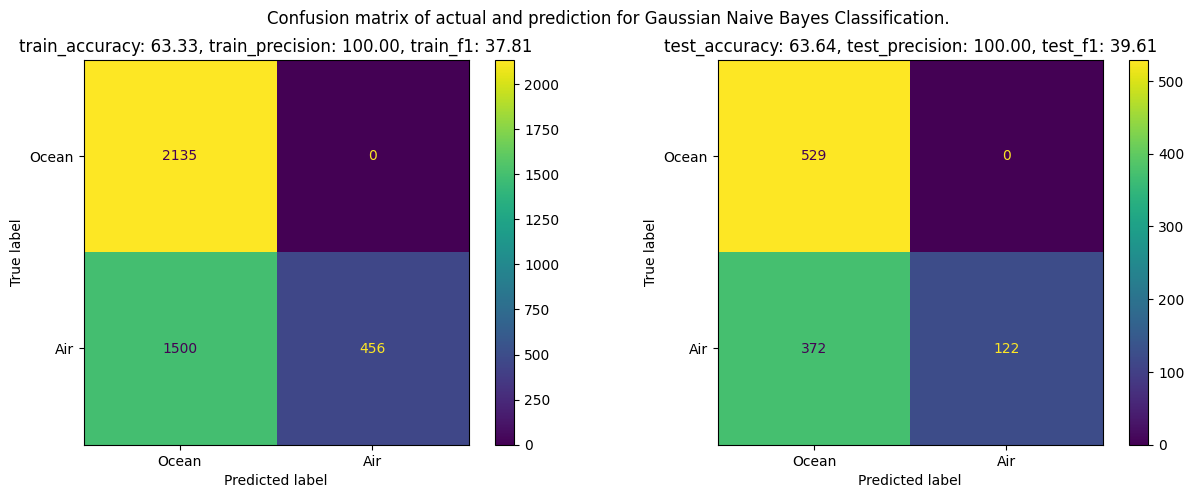

In [57]:
from sklearn.naive_bayes import GaussianNB

# Create model
model = GaussianNB()
predict = prediction_classification(model, X_train, X_test, y_train, y_test)

# Show prediction pipline
display(predict.pipe)

# Evaluation
predict.eval(eval_dict2, 'GaussianNB')

# Plot
fig, axe = predict.plot(labels=['Ocean', 'Air'])
fig.suptitle("Confusion matrix of actual and prediction for Gaussian Naive Bayes Classification.")
plt.show()

### 3.3.4 Logistic Regression

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(random_state=0, solver='liblinear'))])

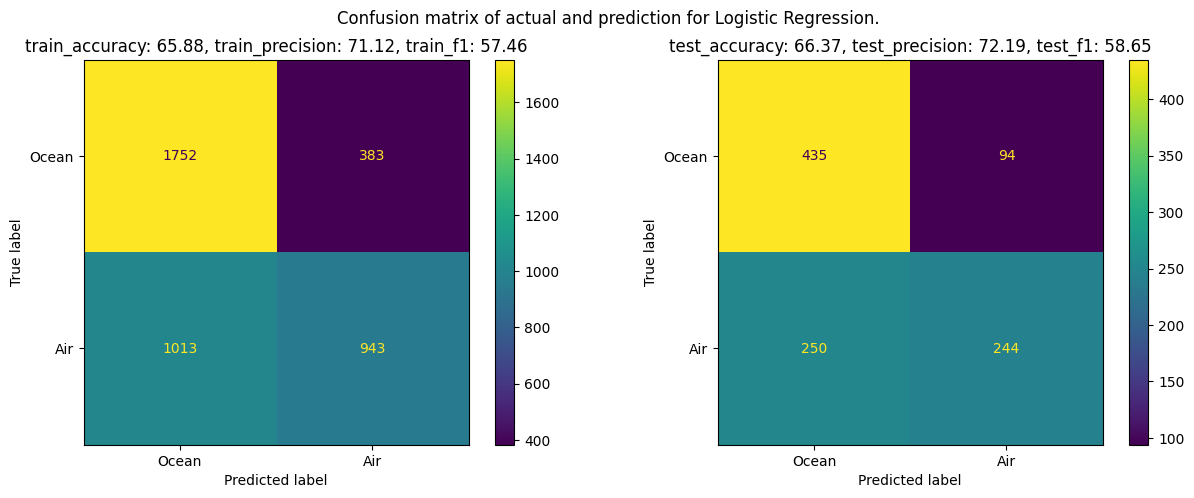

In [58]:
from sklearn.linear_model import LogisticRegression

# Create model
model = LogisticRegression(random_state=0, solver='liblinear')
predict = prediction_classification(model, X_train, X_test, y_train, y_test)

# Show prediction pipline
display(predict.pipe)

# Evaluation
predict.eval(eval_dict2, 'LogisticRegression')

# Plot
fig, axe = predict.plot(labels=['Ocean', 'Air'])
fig.suptitle("Confusion matrix of actual and prediction for Logistic Regression.")
plt.show()

### 3.3.5 Support Vector Machine

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        SVC(degree=2, random_state=0))]),
             n_jobs=1,
             param_grid={'model__degree': [3, 11, 19, 26],
                         'model__kernel': ['rbf', 'sigmoid']})

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC(random_state=0))])

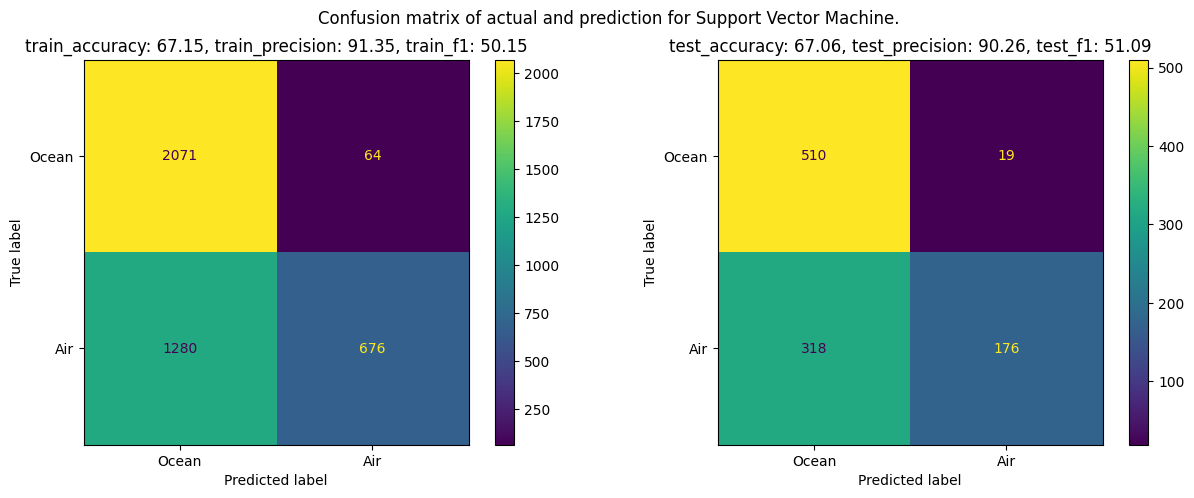

In [59]:
from sklearn.svm import SVC

# Create model
model = SVC(kernel = 'rbf', degree = 2, random_state = 0)
predict = prediction_classification(model, X_train, X_test, y_train, y_test)

# Tuning with GridSearchCV
param_grid = {
    'model__kernel': ['rbf', 'sigmoid'],
    'model__degree': [3, 11, 19, 26]
}
predict.tuning(
    param_grid, 
    select_best=True, cv=5,
    input_parm = "GridSearchCV/SVC_20221128_203947/hyperparameter.pkl")
display(predict.searchCV)

# Show prediction pipline
display(predict.pipe)

# Evaluation
predict.eval(eval_dict2, 'SVM')

# Plot
fig, axe = predict.plot(labels=['Ocean', 'Air'])
fig.suptitle("Confusion matrix of actual and prediction for Support Vector Machine.")
plt.show()

### 3.3.6 K-Nearest Neighbors Classification

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        KNeighborsClassifier(algorithm='ball_tree'))]),
             n_jobs=1,
             param_grid={'model__n_neighbors': [3, 11, 21, 31, 41, 51, 61, 71,
                                                81, 91]})

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(algorithm='ball_tree', n_neighbors=71))])

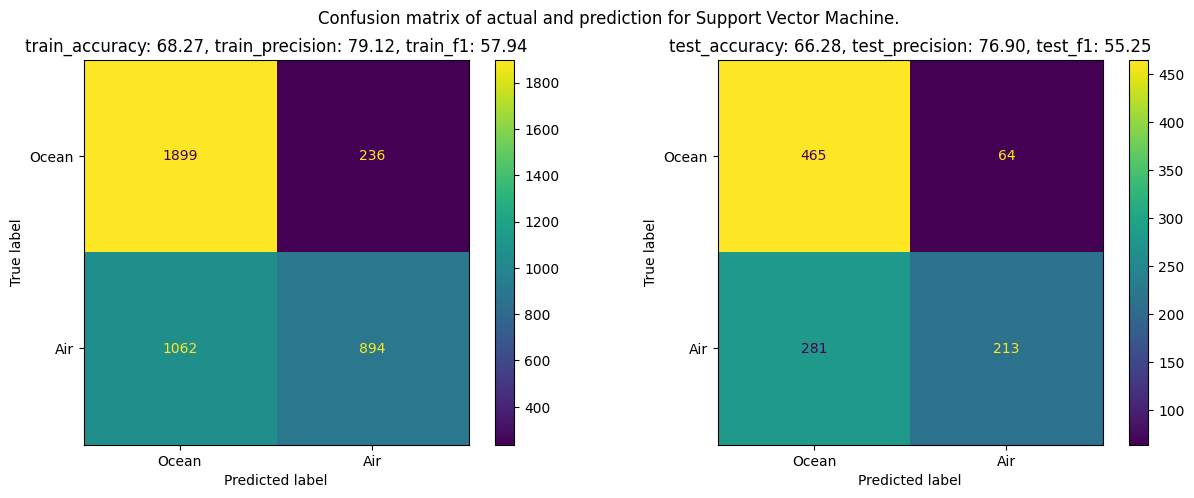

In [60]:
from sklearn.neighbors import KNeighborsClassifier

# Create model
model = KNeighborsClassifier(
    n_neighbors=5, 
    algorithm='ball_tree')
predict = prediction_classification(model, X_train, X_test, y_train, y_test)

# Tuning with GridSearchCV
param_grid = {
    'model__n_neighbors': [3, 11, 21, 31, 41, 51, 61, 71, 81, 91]
}
predict.tuning(
    param_grid, 
    select_best=True, cv=5,
    input_parm = "GridSearchCV/KNeighborsClassifier_20221128_204102/hyperparameter.pkl")
display(predict.searchCV)

# Show prediction pipline
display(predict.pipe)

# Evaluation
predict.eval(eval_dict2, 'KNN')

# Plot
fig, axe = predict.plot(labels=['Ocean', 'Air'])
fig.suptitle("Confusion matrix of actual and prediction for Support Vector Machine.")
plt.show()

### 3.3.7 Plot the metrics

In [61]:
df_plot = pd.DataFrame(eval_dict2).T
df_plot

train_accuracy  test_accuracy  train_precision  \
Random Forest            90.051332      66.959922        95.107746   
GaussianNB               63.334148      63.636364       100.000000   
LogisticRegression       65.876314      66.373412        71.116139   
SVM                      67.147397      67.057674        91.351351   
KNN                      68.271816      66.275660        79.115044   

                    test_precision   train_f1    test_f1  
Random Forest            69.024390  88.919140  62.610619  
GaussianNB              100.000000  37.810945  39.610390  
LogisticRegression       72.189349  57.464960  58.653846  
SVM                      90.256410  50.148368  51.088534  
KNN                      76.895307  57.939080  55.252918

In [62]:
df_plot.sort_values(by='test_f1', ascending=False, inplace=True)
df_plot

train_accuracy  test_accuracy  train_precision  \
Random Forest            90.051332      66.959922        95.107746   
LogisticRegression       65.876314      66.373412        71.116139   
KNN                      68.271816      66.275660        79.115044   
SVM                      67.147397      67.057674        91.351351   
GaussianNB               63.334148      63.636364       100.000000   

                    test_precision   train_f1    test_f1  
Random Forest            69.024390  88.919140  62.610619  
LogisticRegression       72.189349  57.464960  58.653846  
KNN                      76.895307  57.939080  55.252918  
SVM                      90.256410  50.148368  51.088534  
GaussianNB              100.000000  37.810945  39.610390

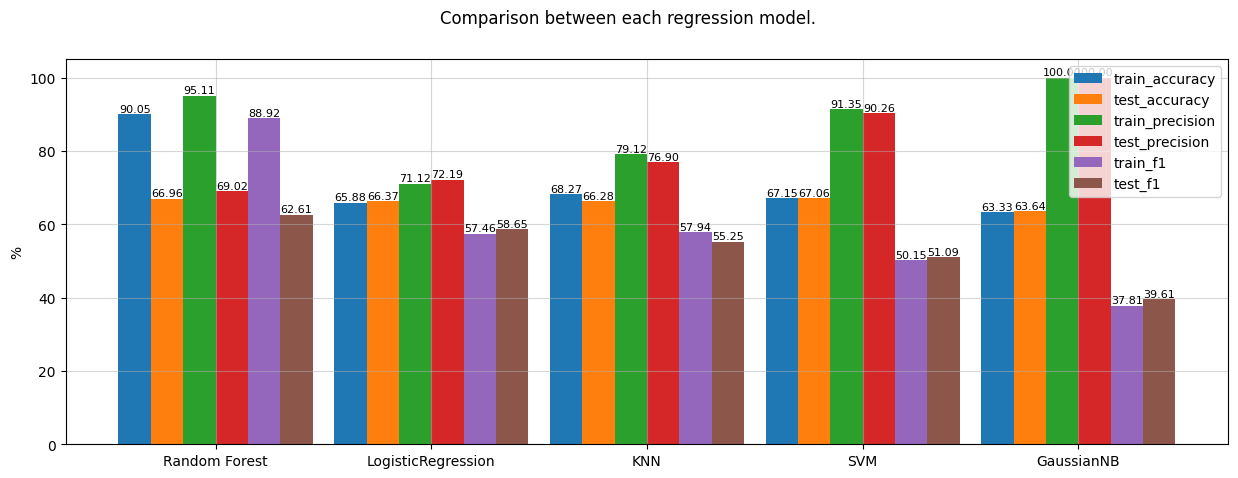

In [63]:
fig, axe = plotMetric(df_plot, width = 0.15)
fig.suptitle('Comparison between each regression model.')
axe.set_ylabel('%')
plt.show()